In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_4.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_33.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_17.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_45.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_51.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_34.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_39.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_29.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_52.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_42.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_48.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_15.jpg
/kaggle/input/face-recognition-ai/Dataset/Faces/Alia Bhatt/Alia Bhatt_36.jpg


In [2]:
import os
import absl.logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
absl.logging.set_verbosity(absl.logging.ERROR)

In [3]:
folder_path = '/kaggle/input/face-recognition-ai/Dataset/Faces'
os.listdir(folder_path)


['Alia Bhatt',
 'Charlize Theron',
 'Zac Efron',
 'Billie Eilish',
 'Jessica Alba',
 'Priyanka Chopra',
 'Natalie Portman',
 'Hrithik Roshan',
 'Tom Cruise',
 'Roger Federer',
 'Henry Cavill',
 'Amitabh Bachchan',
 'Brad Pitt',
 'Dwayne Johnson',
 'Kashyap',
 'Elizabeth Olsen',
 'Camila Cabello',
 'Vijay Deverakonda',
 'Courtney Cox',
 'Ellen Degeneres',
 'Margot Robbie',
 'Anushka Sharma',
 'Lisa Kudrow',
 'Marmik',
 'Robert Downey Jr',
 'Virat Kohli',
 'Claire Holt',
 'Andy Samberg',
 'Alexandra Daddario',
 'Akshay Kumar',
 'Hugh Jackman']

In [4]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from keras_facenet import FaceNet
from mtcnn.mtcnn import MTCNN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical



E0000 00:00:1752923055.801597   19212 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752923055.808434   19212 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
!pip install keras-facenet mtcnn tqdm



In [7]:
detector = MTCNN()
embedder = FaceNet()
required_size = (160, 160)

I0000 00:00:1752923062.152623   19212 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [8]:
import os
import cv2
import numpy as np
from tqdm import tqdm

data_dir = '/kaggle/input/face-recognition-ai/Dataset/Faces'
required_size = (160, 160)

X = []
labels = []
img_paths = []

for label in os.listdir(data_dir):
    person_path = os.path.join(data_dir, label)
    if not os.path.isdir(person_path):
        continue

    for img_name in tqdm(os.listdir(person_path), desc=f"Processing {label}"):
        img_path = os.path.join(person_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = detector.detect_faces(img_rgb)
        if not results:
            continue

        x, y, w, h = results[0]['box']
        x, y = abs(x), abs(y)
        face = img_rgb[y:y+h, x:x+w]
        face = cv2.resize(face, required_size)

        embedding = embedder.embeddings([face])[0]
        X.append(embedding)
        labels.append(label)
        img_paths.append(img_path)


Processing Alia Bhatt:   0%|          | 0/49 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1752923070.741240   19271 service.cc:148] XLA service 0x78bfe4003500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752923070.741273   19271 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752923071.911615   19271 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


I0000 00:00:1752923074.246690   19271 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Processing Alia Bhatt:   2%|▏         | 1/49 [00:08<06:45,  8.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:   4%|▍         | 2/49 [00:08<02:49,  3.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Alia Bhatt:   6%|▌         | 3/49 [00:08<01:34,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:   8%|▊         | 4/49 [00:09<00:59,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  10%|█         | 5/49 [00:09<00:40,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  12%|█▏        | 6/49 [00:09<00:29,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Alia Bhatt:  14%|█▍        | 7/49 [00:09<00:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  16%|█▋        | 8/49 [00:09<00:17,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alia Bhatt:  18%|█▊        | 9/49 [00:10<00:14,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  20%|██        | 10/49 [00:10<00:12,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  22%|██▏       | 11/49 [00:10<00:11,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  24%|██▍       | 12/49 [00:10<00:09,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alia Bhatt:  27%|██▋       | 13/49 [00:11<00:09,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  29%|██▊       | 14/49 [00:11<00:08,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  31%|███       | 15/49 [00:11<00:08,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Alia Bhatt:  33%|███▎      | 16/49 [00:11<00:07,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alia Bhatt:  35%|███▍      | 17/49 [00:11<00:07,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  37%|███▋      | 18/49 [00:12<00:07,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  39%|███▉      | 19/49 [00:12<00:06,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  41%|████      | 20/49 [00:12<00:06,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  43%|████▎     | 21/49 [00:12<00:06,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alia Bhatt:  45%|████▍     | 22/49 [00:13<00:06,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  47%|████▋     | 23/49 [00:13<00:05,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Alia Bhatt:  49%|████▉     | 24/49 [00:13<00:05,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Alia Bhatt:  51%|█████     | 25/49 [00:13<00:05,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  53%|█████▎    | 26/49 [00:14<00:05,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alia Bhatt:  55%|█████▌    | 27/49 [00:14<00:04,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  57%|█████▋    | 28/49 [00:14<00:04,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  59%|█████▉    | 29/49 [00:14<00:04,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  61%|██████    | 30/49 [00:14<00:04,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  63%|██████▎   | 31/49 [00:15<00:03,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  65%|██████▌   | 32/49 [00:15<00:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  67%|██████▋   | 33/49 [00:15<00:03,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  69%|██████▉   | 34/49 [00:15<00:03,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Alia Bhatt:  71%|███████▏  | 35/49 [00:15<00:03,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  73%|███████▎  | 36/49 [00:16<00:02,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alia Bhatt:  76%|███████▌  | 37/49 [00:16<00:02,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Alia Bhatt:  78%|███████▊  | 38/49 [00:16<00:02,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  80%|███████▉  | 39/49 [00:16<00:02,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  82%|████████▏ | 40/49 [00:17<00:01,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  84%|████████▎ | 41/49 [00:17<00:01,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alia Bhatt:  86%|████████▌ | 42/49 [00:17<00:01,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Alia Bhatt:  88%|████████▊ | 43/49 [00:17<00:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alia Bhatt:  90%|████████▉ | 44/49 [00:17<00:01,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  92%|█████████▏| 45/49 [00:18<00:00,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  94%|█████████▍| 46/49 [00:18<00:00,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alia Bhatt:  96%|█████████▌| 47/49 [00:18<00:00,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alia Bhatt:  98%|█████████▊| 48/49 [00:18<00:00,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:   2%|▏         | 1/49 [00:00<00:10,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:   4%|▍         | 2/49 [00:00<00:10,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Charlize Theron:   6%|▌         | 3/49 [00:00<00:09,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:   8%|▊         | 4/49 [00:00<00:09,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  10%|█         | 5/49 [00:01<00:09,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  12%|█▏        | 6/49 [00:01<00:09,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  14%|█▍        | 7/49 [00:01<00:09,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Charlize Theron:  16%|█▋        | 8/49 [00:01<00:08,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Charlize Theron:  18%|█▊        | 9/49 [00:01<00:08,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Charlize Theron:  20%|██        | 10/49 [00:02<00:08,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Charlize Theron:  22%|██▏       | 11/49 [00:02<00:08,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  24%|██▍       | 12/49 [00:02<00:07,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Charlize Theron:  27%|██▋       | 13/49 [00:02<00:07,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Charlize Theron:  29%|██▊       | 14/49 [00:03<00:07,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Charlize Theron:  31%|███       | 15/49 [00:03<00:07,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  33%|███▎      | 16/49 [00:03<00:07,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  35%|███▍      | 17/49 [00:03<00:07,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  37%|███▋      | 18/49 [00:03<00:06,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  39%|███▉      | 19/49 [00:04<00:06,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Charlize Theron:  41%|████      | 20/49 [00:04<00:06,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Charlize Theron:  43%|████▎     | 21/49 [00:04<00:06,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  45%|████▍     | 22/49 [00:04<00:05,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Charlize Theron:  47%|████▋     | 23/49 [00:05<00:05,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  49%|████▉     | 24/49 [00:05<00:05,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  51%|█████     | 25/49 [00:05<00:05,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  53%|█████▎    | 26/49 [00:05<00:05,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  55%|█████▌    | 27/49 [00:05<00:04,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Charlize Theron:  57%|█████▋    | 28/49 [00:06<00:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  59%|█████▉    | 29/49 [00:06<00:04,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  61%|██████    | 30/49 [00:06<00:04,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  63%|██████▎   | 31/49 [00:06<00:03,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Charlize Theron:  65%|██████▌   | 32/49 [00:06<00:03,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  67%|██████▋   | 33/49 [00:07<00:03,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  69%|██████▉   | 34/49 [00:07<00:03,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  71%|███████▏  | 35/49 [00:07<00:02,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  73%|███████▎  | 36/49 [00:07<00:02,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  76%|███████▌  | 37/49 [00:08<00:02,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Charlize Theron:  78%|███████▊  | 38/49 [00:08<00:02,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Charlize Theron:  80%|███████▉  | 39/49 [00:08<00:02,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  82%|████████▏ | 40/49 [00:08<00:02,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Charlize Theron:  84%|████████▎ | 41/49 [00:08<00:01,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Charlize Theron:  86%|████████▌ | 42/49 [00:09<00:01,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  88%|████████▊ | 43/49 [00:09<00:01,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  90%|████████▉ | 44/49 [00:09<00:01,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  92%|█████████▏| 45/49 [00:09<00:00,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  94%|█████████▍| 46/49 [00:09<00:00,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Charlize Theron:  96%|█████████▌| 47/49 [00:10<00:00,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Charlize Theron:  98%|█████████▊| 48/49 [00:10<00:00,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Zac Efron:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Zac Efron:   2%|▏         | 1/49 [00:00<00:11,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Zac Efron:   4%|▍         | 2/49 [00:00<00:11,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:   6%|▌         | 3/49 [00:00<00:10,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:   8%|▊         | 4/49 [00:00<00:10,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  10%|█         | 5/49 [00:01<00:09,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  12%|█▏        | 6/49 [00:01<00:09,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  14%|█▍        | 7/49 [00:01<00:09,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  16%|█▋        | 8/49 [00:01<00:09,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Zac Efron:  18%|█▊        | 9/49 [00:02<00:08,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  20%|██        | 10/49 [00:02<00:08,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  22%|██▏       | 11/49 [00:02<00:08,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Zac Efron:  24%|██▍       | 12/49 [00:02<00:08,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  27%|██▋       | 13/49 [00:02<00:07,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  29%|██▊       | 14/49 [00:03<00:07,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  31%|███       | 15/49 [00:03<00:07,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:  33%|███▎      | 16/49 [00:03<00:07,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:  35%|███▍      | 17/49 [00:03<00:07,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  37%|███▋      | 18/49 [00:04<00:06,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:  39%|███▉      | 19/49 [00:04<00:06,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  41%|████      | 20/49 [00:04<00:06,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  43%|████▎     | 21/49 [00:04<00:06,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  45%|████▍     | 22/49 [00:04<00:06,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Zac Efron:  47%|████▋     | 23/49 [00:05<00:05,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  49%|████▉     | 24/49 [00:05<00:05,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  51%|█████     | 25/49 [00:05<00:05,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  53%|█████▎    | 26/49 [00:05<00:05,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  55%|█████▌    | 27/49 [00:06<00:04,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  57%|█████▋    | 28/49 [00:06<00:04,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:  59%|█████▉    | 29/49 [00:06<00:04,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  61%|██████    | 30/49 [00:06<00:04,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  63%|██████▎   | 31/49 [00:06<00:04,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:  65%|██████▌   | 32/49 [00:07<00:03,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  67%|██████▋   | 33/49 [00:07<00:03,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  69%|██████▉   | 34/49 [00:07<00:03,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  71%|███████▏  | 35/49 [00:07<00:03,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  73%|███████▎  | 36/49 [00:08<00:02,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:  76%|███████▌  | 37/49 [00:08<00:02,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  78%|███████▊  | 38/49 [00:08<00:02,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:  80%|███████▉  | 39/49 [00:08<00:02,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  82%|████████▏ | 40/49 [00:08<00:02,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Zac Efron:  84%|████████▎ | 41/49 [00:09<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  86%|████████▌ | 42/49 [00:09<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  88%|████████▊ | 43/49 [00:09<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Zac Efron:  90%|████████▉ | 44/49 [00:09<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  92%|█████████▏| 45/49 [00:10<00:00,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:  94%|█████████▍| 46/49 [00:10<00:00,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Zac Efron:  96%|█████████▌| 47/49 [00:10<00:00,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Zac Efron:  98%|█████████▊| 48/49 [00:10<00:00,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:   2%|▏         | 1/49 [00:00<00:10,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:   4%|▍         | 2/49 [00:00<00:10,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:   6%|▌         | 3/49 [00:00<00:09,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Billie Eilish:   8%|▊         | 4/49 [00:00<00:09,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  10%|█         | 5/49 [00:01<00:09,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  12%|█▏        | 6/49 [00:01<00:09,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  14%|█▍        | 7/49 [00:01<00:09,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  16%|█▋        | 8/49 [00:01<00:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Billie Eilish:  18%|█▊        | 9/49 [00:01<00:08,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  20%|██        | 10/49 [00:02<00:08,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  22%|██▏       | 11/49 [00:02<00:08,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  24%|██▍       | 12/49 [00:02<00:08,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  27%|██▋       | 13/49 [00:02<00:08,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Billie Eilish:  29%|██▊       | 14/49 [00:03<00:08,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Billie Eilish:  31%|███       | 15/49 [00:03<00:07,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Billie Eilish:  33%|███▎      | 16/49 [00:03<00:07,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  35%|███▍      | 17/49 [00:03<00:07,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  37%|███▋      | 18/49 [00:04<00:07,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Billie Eilish:  39%|███▉      | 19/49 [00:04<00:06,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  41%|████      | 20/49 [00:04<00:06,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  43%|████▎     | 21/49 [00:04<00:06,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Billie Eilish:  45%|████▍     | 22/49 [00:04<00:06,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  47%|████▋     | 23/49 [00:05<00:05,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Billie Eilish:  49%|████▉     | 24/49 [00:05<00:05,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Billie Eilish:  51%|█████     | 25/49 [00:05<00:05,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  53%|█████▎    | 26/49 [00:05<00:05,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Billie Eilish:  55%|█████▌    | 27/49 [00:06<00:05,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Billie Eilish:  57%|█████▋    | 28/49 [00:06<00:04,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Billie Eilish:  59%|█████▉    | 29/49 [00:06<00:04,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  61%|██████    | 30/49 [00:06<00:04,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  63%|██████▎   | 31/49 [00:06<00:04,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  65%|██████▌   | 32/49 [00:07<00:03,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Billie Eilish:  67%|██████▋   | 33/49 [00:07<00:03,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  69%|██████▉   | 34/49 [00:07<00:03,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  71%|███████▏  | 35/49 [00:07<00:03,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  73%|███████▎  | 36/49 [00:08<00:02,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  76%|███████▌  | 37/49 [00:08<00:02,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  78%|███████▊  | 38/49 [00:08<00:02,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  80%|███████▉  | 39/49 [00:08<00:02,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Billie Eilish:  82%|████████▏ | 40/49 [00:08<00:02,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Billie Eilish:  84%|████████▎ | 41/49 [00:09<00:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  86%|████████▌ | 42/49 [00:09<00:01,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Billie Eilish:  88%|████████▊ | 43/49 [00:09<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  90%|████████▉ | 44/49 [00:09<00:01,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Billie Eilish:  92%|█████████▏| 45/49 [00:10<00:00,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Billie Eilish:  94%|█████████▍| 46/49 [00:10<00:00,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Billie Eilish:  96%|█████████▌| 47/49 [00:10<00:00,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Billie Eilish:  98%|█████████▊| 48/49 [00:10<00:00,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:   2%|▏         | 1/49 [00:00<00:10,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:   4%|▍         | 2/49 [00:00<00:10,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:   6%|▌         | 3/49 [00:00<00:10,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Jessica Alba:   8%|▊         | 4/49 [00:00<00:09,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  10%|█         | 5/49 [00:01<00:09,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  12%|█▏        | 6/49 [00:01<00:09,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Jessica Alba:  14%|█▍        | 7/49 [00:01<00:09,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Jessica Alba:  16%|█▋        | 8/49 [00:01<00:08,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Jessica Alba:  18%|█▊        | 9/49 [00:01<00:08,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Jessica Alba:  20%|██        | 10/49 [00:02<00:08,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  22%|██▏       | 11/49 [00:02<00:08,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Jessica Alba:  24%|██▍       | 12/49 [00:02<00:08,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Jessica Alba:  27%|██▋       | 13/49 [00:02<00:08,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  29%|██▊       | 14/49 [00:03<00:07,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Jessica Alba:  31%|███       | 15/49 [00:03<00:07,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  33%|███▎      | 16/49 [00:03<00:07,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  35%|███▍      | 17/49 [00:03<00:07,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  37%|███▋      | 18/49 [00:03<00:06,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  39%|███▉      | 19/49 [00:04<00:06,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  41%|████      | 20/49 [00:04<00:06,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  43%|████▎     | 21/49 [00:04<00:06,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Jessica Alba:  45%|████▍     | 22/49 [00:04<00:05,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Jessica Alba:  47%|████▋     | 23/49 [00:05<00:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  49%|████▉     | 24/49 [00:05<00:05,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  51%|█████     | 25/49 [00:05<00:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Jessica Alba:  53%|█████▎    | 26/49 [00:05<00:05,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  55%|█████▌    | 27/49 [00:05<00:04,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  57%|█████▋    | 28/49 [00:06<00:04,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  59%|█████▉    | 29/49 [00:06<00:04,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  61%|██████    | 30/49 [00:06<00:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  63%|██████▎   | 31/49 [00:06<00:03,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  65%|██████▌   | 32/49 [00:07<00:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  67%|██████▋   | 33/49 [00:07<00:03,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Jessica Alba:  69%|██████▉   | 34/49 [00:07<00:03,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  71%|███████▏  | 35/49 [00:07<00:03,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Jessica Alba:  73%|███████▎  | 36/49 [00:07<00:02,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  76%|███████▌  | 37/49 [00:08<00:02,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  78%|███████▊  | 38/49 [00:08<00:02,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  80%|███████▉  | 39/49 [00:08<00:02,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Jessica Alba:  82%|████████▏ | 40/49 [00:08<00:01,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Jessica Alba:  84%|████████▎ | 41/49 [00:08<00:01,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Jessica Alba:  86%|████████▌ | 42/49 [00:09<00:01,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Jessica Alba:  88%|████████▊ | 43/49 [00:09<00:01,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Jessica Alba:  90%|████████▉ | 44/49 [00:09<00:01,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Jessica Alba:  92%|█████████▏| 45/49 [00:09<00:00,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Jessica Alba:  94%|█████████▍| 46/49 [00:10<00:00,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Jessica Alba:  96%|█████████▌| 47/49 [00:10<00:00,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Jessica Alba:  98%|█████████▊| 48/49 [00:10<00:00,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:   2%|▏         | 1/49 [00:00<00:10,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Priyanka Chopra:   4%|▍         | 2/49 [00:00<00:10,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:   6%|▌         | 3/49 [00:00<00:10,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Priyanka Chopra:   8%|▊         | 4/49 [00:00<00:10,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  10%|█         | 5/49 [00:01<00:10,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Priyanka Chopra:  12%|█▏        | 6/49 [00:01<00:10,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Priyanka Chopra:  14%|█▍        | 7/49 [00:01<00:10,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  16%|█▋        | 8/49 [00:01<00:10,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:  18%|█▊        | 9/49 [00:02<00:09,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:  20%|██        | 10/49 [00:02<00:09,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Priyanka Chopra:  22%|██▏       | 11/49 [00:02<00:08,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Priyanka Chopra:  24%|██▍       | 12/49 [00:02<00:08,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Priyanka Chopra:  27%|██▋       | 13/49 [00:03<00:08,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Priyanka Chopra:  29%|██▊       | 14/49 [00:03<00:07,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  31%|███       | 15/49 [00:03<00:07,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  33%|███▎      | 16/49 [00:03<00:07,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Priyanka Chopra:  35%|███▍      | 17/49 [00:03<00:07,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  37%|███▋      | 18/49 [00:04<00:07,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  39%|███▉      | 19/49 [00:04<00:06,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  41%|████      | 20/49 [00:04<00:06,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  43%|████▎     | 21/49 [00:04<00:06,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  45%|████▍     | 22/49 [00:05<00:06,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  47%|████▋     | 23/49 [00:05<00:06,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  49%|████▉     | 24/49 [00:05<00:05,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  51%|█████     | 25/49 [00:05<00:05,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  53%|█████▎    | 26/49 [00:06<00:05,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  55%|█████▌    | 27/49 [00:06<00:05,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  57%|█████▋    | 28/49 [00:06<00:04,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Priyanka Chopra:  59%|█████▉    | 29/49 [00:06<00:04,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  61%|██████    | 30/49 [00:07<00:04,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Priyanka Chopra:  63%|██████▎   | 31/49 [00:07<00:04,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  65%|██████▌   | 32/49 [00:07<00:03,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:  67%|██████▋   | 33/49 [00:07<00:03,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Priyanka Chopra:  69%|██████▉   | 34/49 [00:07<00:03,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  71%|███████▏  | 35/49 [00:08<00:03,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:  73%|███████▎  | 36/49 [00:08<00:02,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  76%|███████▌  | 37/49 [00:08<00:02,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Priyanka Chopra:  78%|███████▊  | 38/49 [00:08<00:02,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  80%|███████▉  | 39/49 [00:09<00:02,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  82%|████████▏ | 40/49 [00:09<00:02,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  84%|████████▎ | 41/49 [00:09<00:01,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  86%|████████▌ | 42/49 [00:09<00:01,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:  88%|████████▊ | 43/49 [00:10<00:01,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:  90%|████████▉ | 44/49 [00:10<00:01,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Priyanka Chopra:  92%|█████████▏| 45/49 [00:10<00:00,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Priyanka Chopra:  94%|█████████▍| 46/49 [00:10<00:00,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Priyanka Chopra:  96%|█████████▌| 47/49 [00:10<00:00,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Priyanka Chopra:  98%|█████████▊| 48/49 [00:11<00:00,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:   2%|▏         | 1/49 [00:00<00:11,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:   4%|▍         | 2/49 [00:00<00:10,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:   6%|▌         | 3/49 [00:00<00:10,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:   8%|▊         | 4/49 [00:00<00:10,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Natalie Portman:  10%|█         | 5/49 [00:01<00:10,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  12%|█▏        | 6/49 [00:01<00:09,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  14%|█▍        | 7/49 [00:01<00:09,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Natalie Portman:  16%|█▋        | 8/49 [00:01<00:09,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  18%|█▊        | 9/49 [00:02<00:08,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:  20%|██        | 10/49 [00:02<00:09,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  22%|██▏       | 11/49 [00:02<00:08,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:  24%|██▍       | 12/49 [00:02<00:08,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  27%|██▋       | 13/49 [00:02<00:08,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:  29%|██▊       | 14/49 [00:03<00:07,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Natalie Portman:  31%|███       | 15/49 [00:03<00:07,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Natalie Portman:  33%|███▎      | 16/49 [00:03<00:07,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:  35%|███▍      | 17/49 [00:03<00:07,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  37%|███▋      | 18/49 [00:04<00:07,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Natalie Portman:  39%|███▉      | 19/49 [00:04<00:06,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Natalie Portman:  41%|████      | 20/49 [00:04<00:06,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  43%|████▎     | 21/49 [00:04<00:06,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Natalie Portman:  45%|████▍     | 22/49 [00:05<00:06,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  47%|████▋     | 23/49 [00:05<00:05,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Natalie Portman:  49%|████▉     | 24/49 [00:05<00:05,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:  51%|█████     | 25/49 [00:05<00:05,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:  53%|█████▎    | 26/49 [00:05<00:05,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Natalie Portman:  55%|█████▌    | 27/49 [00:06<00:05,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:  57%|█████▋    | 28/49 [00:06<00:04,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  59%|█████▉    | 29/49 [00:06<00:04,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Natalie Portman:  61%|██████    | 30/49 [00:06<00:04,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  63%|██████▎   | 31/49 [00:07<00:04,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Natalie Portman:  65%|██████▌   | 32/49 [00:07<00:03,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Natalie Portman:  67%|██████▋   | 33/49 [00:07<00:03,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  69%|██████▉   | 34/49 [00:07<00:03,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Natalie Portman:  71%|███████▏  | 35/49 [00:07<00:03,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  73%|███████▎  | 36/49 [00:08<00:02,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Natalie Portman:  76%|███████▌  | 37/49 [00:08<00:02,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  78%|███████▊  | 38/49 [00:08<00:02,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  80%|███████▉  | 39/49 [00:08<00:02,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  82%|████████▏ | 40/49 [00:09<00:02,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Natalie Portman:  84%|████████▎ | 41/49 [00:09<00:01,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:  86%|████████▌ | 42/49 [00:09<00:01,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Natalie Portman:  88%|████████▊ | 43/49 [00:09<00:01,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Natalie Portman:  90%|████████▉ | 44/49 [00:10<00:01,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Natalie Portman:  92%|█████████▏| 45/49 [00:10<00:00,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Natalie Portman:  94%|█████████▍| 46/49 [00:10<00:00,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Natalie Portman:  96%|█████████▌| 47/49 [00:10<00:00,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Natalie Portman:  98%|█████████▊| 48/49 [00:10<00:00,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:   2%|▏         | 1/49 [00:00<00:11,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:   4%|▍         | 2/49 [00:00<00:11,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Hrithik Roshan:   6%|▌         | 3/49 [00:00<00:11,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:   8%|▊         | 4/49 [00:00<00:10,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  10%|█         | 5/49 [00:01<00:10,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Hrithik Roshan:  12%|█▏        | 6/49 [00:01<00:10,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  14%|█▍        | 7/49 [00:01<00:10,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  16%|█▋        | 8/49 [00:01<00:10,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Hrithik Roshan:  18%|█▊        | 9/49 [00:02<00:09,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Hrithik Roshan:  20%|██        | 10/49 [00:02<00:09,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Hrithik Roshan:  22%|██▏       | 11/49 [00:02<00:09,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  24%|██▍       | 12/49 [00:02<00:08,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Hrithik Roshan:  27%|██▋       | 13/49 [00:03<00:08,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  29%|██▊       | 14/49 [00:03<00:08,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  31%|███       | 15/49 [00:03<00:08,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  33%|███▎      | 16/49 [00:03<00:07,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Hrithik Roshan:  35%|███▍      | 17/49 [00:04<00:07,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  37%|███▋      | 18/49 [00:04<00:07,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  39%|███▉      | 19/49 [00:04<00:06,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  41%|████      | 20/49 [00:04<00:06,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Hrithik Roshan:  43%|████▎     | 21/49 [00:05<00:06,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Hrithik Roshan:  45%|████▍     | 22/49 [00:05<00:06,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Hrithik Roshan:  47%|████▋     | 23/49 [00:05<00:06,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  49%|████▉     | 24/49 [00:05<00:05,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  51%|█████     | 25/49 [00:05<00:05,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  53%|█████▎    | 26/49 [00:06<00:05,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Hrithik Roshan:  55%|█████▌    | 27/49 [00:06<00:05,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  57%|█████▋    | 28/49 [00:06<00:05,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  59%|█████▉    | 29/49 [00:06<00:04,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  61%|██████    | 30/49 [00:07<00:04,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Hrithik Roshan:  63%|██████▎   | 31/49 [00:07<00:04,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  65%|██████▌   | 32/49 [00:07<00:04,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Hrithik Roshan:  67%|██████▋   | 33/49 [00:07<00:03,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Hrithik Roshan:  69%|██████▉   | 34/49 [00:08<00:03,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Processing Hrithik Roshan:  71%|███████▏  | 35/49 [00:08<00:03,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Hrithik Roshan:  73%|███████▎  | 36/49 [00:08<00:03,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  76%|███████▌  | 37/49 [00:08<00:03,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  78%|███████▊  | 38/49 [00:09<00:02,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  80%|███████▉  | 39/49 [00:09<00:02,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Hrithik Roshan:  82%|████████▏ | 40/49 [00:09<00:02,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Hrithik Roshan:  84%|████████▎ | 41/49 [00:09<00:01,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  90%|████████▉ | 44/49 [00:10<00:00,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Hrithik Roshan:  92%|█████████▏| 45/49 [00:10<00:00,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hrithik Roshan:  94%|█████████▍| 46/49 [00:10<00:00,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Hrithik Roshan:  96%|█████████▌| 47/49 [00:11<00:00,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Tom Cruise:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Tom Cruise:   2%|▏         | 1/49 [00:00<00:11,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Tom Cruise:   4%|▍         | 2/49 [00:00<00:11,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Tom Cruise:   6%|▌         | 3/49 [00:00<00:10,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Tom Cruise:   8%|▊         | 4/49 [00:00<00:10,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Tom Cruise:  10%|█         | 5/49 [00:01<00:10,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Tom Cruise:  12%|█▏        | 6/49 [00:01<00:09,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Tom Cruise:  14%|█▍        | 7/49 [00:01<00:09,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Tom Cruise:  16%|█▋        | 8/49 [00:01<00:09,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  18%|█▊        | 9/49 [00:02<00:09,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Tom Cruise:  20%|██        | 10/49 [00:02<00:09,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Tom Cruise:  22%|██▏       | 11/49 [00:02<00:08,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Tom Cruise:  24%|██▍       | 12/49 [00:02<00:08,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  27%|██▋       | 13/49 [00:03<00:08,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Tom Cruise:  29%|██▊       | 14/49 [00:03<00:08,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Tom Cruise:  31%|███       | 15/49 [00:03<00:07,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  33%|███▎      | 16/49 [00:03<00:07,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  35%|███▍      | 17/49 [00:03<00:07,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  37%|███▋      | 18/49 [00:04<00:06,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Tom Cruise:  39%|███▉      | 19/49 [00:04<00:06,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  41%|████      | 20/49 [00:04<00:06,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  43%|████▎     | 21/49 [00:04<00:06,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  45%|████▍     | 22/49 [00:05<00:05,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Tom Cruise:  47%|████▋     | 23/49 [00:05<00:05,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  49%|████▉     | 24/49 [00:05<00:05,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  51%|█████     | 25/49 [00:05<00:05,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Tom Cruise:  53%|█████▎    | 26/49 [00:05<00:05,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  55%|█████▌    | 27/49 [00:06<00:04,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  57%|█████▋    | 28/49 [00:06<00:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  59%|█████▉    | 29/49 [00:06<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  61%|██████    | 30/49 [00:06<00:04,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Processing Tom Cruise:  63%|██████▎   | 31/49 [00:07<00:04,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Tom Cruise:  65%|██████▌   | 32/49 [00:07<00:03,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  67%|██████▋   | 33/49 [00:07<00:03,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  69%|██████▉   | 34/49 [00:07<00:03,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  71%|███████▏  | 35/49 [00:07<00:03,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  73%|███████▎  | 36/49 [00:08<00:02,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  76%|███████▌  | 37/49 [00:08<00:02,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  78%|███████▊  | 38/49 [00:08<00:02,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  80%|███████▉  | 39/49 [00:08<00:02,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  82%|████████▏ | 40/49 [00:08<00:01,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  84%|████████▎ | 41/49 [00:09<00:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  86%|████████▌ | 42/49 [00:09<00:01,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  88%|████████▊ | 43/49 [00:09<00:01,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Tom Cruise:  90%|████████▉ | 44/49 [00:09<00:01,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Tom Cruise:  92%|█████████▏| 45/49 [00:10<00:00,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Tom Cruise:  94%|█████████▍| 46/49 [00:10<00:00,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  96%|█████████▌| 47/49 [00:10<00:00,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Tom Cruise:  98%|█████████▊| 48/49 [00:10<00:00,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Roger Federer:   2%|▏         | 1/49 [00:00<00:11,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:   4%|▍         | 2/49 [00:00<00:10,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:   6%|▌         | 3/49 [00:00<00:10,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:   8%|▊         | 4/49 [00:00<00:09,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  10%|█         | 5/49 [00:01<00:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Roger Federer:  12%|█▏        | 6/49 [00:01<00:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Roger Federer:  14%|█▍        | 7/49 [00:01<00:09,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Roger Federer:  16%|█▋        | 8/49 [00:01<00:08,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  18%|█▊        | 9/49 [00:01<00:08,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  20%|██        | 10/49 [00:02<00:08,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  22%|██▏       | 11/49 [00:02<00:08,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Roger Federer:  24%|██▍       | 12/49 [00:02<00:08,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  27%|██▋       | 13/49 [00:02<00:07,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  29%|██▊       | 14/49 [00:03<00:07,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Roger Federer:  31%|███       | 15/49 [00:03<00:07,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  33%|███▎      | 16/49 [00:03<00:07,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  35%|███▍      | 17/49 [00:03<00:07,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Roger Federer:  37%|███▋      | 18/49 [00:03<00:06,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  39%|███▉      | 19/49 [00:04<00:06,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  41%|████      | 20/49 [00:04<00:06,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  43%|████▎     | 21/49 [00:04<00:06,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Roger Federer:  45%|████▍     | 22/49 [00:04<00:05,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  47%|████▋     | 23/49 [00:05<00:05,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  49%|████▉     | 24/49 [00:05<00:05,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  51%|█████     | 25/49 [00:05<00:05,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Roger Federer:  53%|█████▎    | 26/49 [00:05<00:04,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  55%|█████▌    | 27/49 [00:05<00:04,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  57%|█████▋    | 28/49 [00:06<00:04,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Roger Federer:  59%|█████▉    | 29/49 [00:06<00:04,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  61%|██████    | 30/49 [00:06<00:04,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  63%|██████▎   | 31/49 [00:06<00:04,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  65%|██████▌   | 32/49 [00:07<00:03,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  67%|██████▋   | 33/49 [00:07<00:03,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  69%|██████▉   | 34/49 [00:07<00:03,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  71%|███████▏  | 35/49 [00:07<00:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Roger Federer:  73%|███████▎  | 36/49 [00:07<00:02,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  76%|███████▌  | 37/49 [00:08<00:02,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Roger Federer:  78%|███████▊  | 38/49 [00:08<00:02,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  80%|███████▉  | 39/49 [00:08<00:02,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  82%|████████▏ | 40/49 [00:08<00:01,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Roger Federer:  84%|████████▎ | 41/49 [00:08<00:01,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  86%|████████▌ | 42/49 [00:09<00:01,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  88%|████████▊ | 43/49 [00:09<00:01,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Roger Federer:  90%|████████▉ | 44/49 [00:09<00:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  92%|█████████▏| 45/49 [00:09<00:00,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  94%|█████████▍| 46/49 [00:10<00:00,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Roger Federer:  96%|█████████▌| 47/49 [00:10<00:00,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Roger Federer:  98%|█████████▊| 48/49 [00:10<00:00,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:   2%|▏         | 1/49 [00:00<00:10,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:   4%|▍         | 2/49 [00:00<00:10,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:   6%|▌         | 3/49 [00:00<00:10,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:   8%|▊         | 4/49 [00:00<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Henry Cavill:  10%|█         | 5/49 [00:01<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Henry Cavill:  12%|█▏        | 6/49 [00:01<00:09,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  14%|█▍        | 7/49 [00:01<00:09,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Henry Cavill:  16%|█▋        | 8/49 [00:01<00:09,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  18%|█▊        | 9/49 [00:01<00:08,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  20%|██        | 10/49 [00:02<00:08,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Henry Cavill:  22%|██▏       | 11/49 [00:02<00:08,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  24%|██▍       | 12/49 [00:02<00:08,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  27%|██▋       | 13/49 [00:02<00:07,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Henry Cavill:  29%|██▊       | 14/49 [00:03<00:07,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  31%|███       | 15/49 [00:03<00:07,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  33%|███▎      | 16/49 [00:03<00:07,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  35%|███▍      | 17/49 [00:03<00:07,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  37%|███▋      | 18/49 [00:03<00:06,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Henry Cavill:  39%|███▉      | 19/49 [00:04<00:06,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  41%|████      | 20/49 [00:04<00:06,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Henry Cavill:  43%|████▎     | 21/49 [00:04<00:06,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Henry Cavill:  45%|████▍     | 22/49 [00:04<00:05,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  47%|████▋     | 23/49 [00:05<00:05,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Processing Henry Cavill:  49%|████▉     | 24/49 [00:05<00:05,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  51%|█████     | 25/49 [00:05<00:05,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  53%|█████▎    | 26/49 [00:05<00:05,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Processing Henry Cavill:  55%|█████▌    | 27/49 [00:06<00:05,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Henry Cavill:  57%|█████▋    | 28/49 [00:06<00:05,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  59%|█████▉    | 29/49 [00:06<00:04,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Henry Cavill:  61%|██████    | 30/49 [00:06<00:04,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Henry Cavill:  63%|██████▎   | 31/49 [00:06<00:04,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  65%|██████▌   | 32/49 [00:07<00:03,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Henry Cavill:  67%|██████▋   | 33/49 [00:07<00:03,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  69%|██████▉   | 34/49 [00:07<00:03,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  71%|███████▏  | 35/49 [00:07<00:03,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  73%|███████▎  | 36/49 [00:08<00:02,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Henry Cavill:  76%|███████▌  | 37/49 [00:08<00:02,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  78%|███████▊  | 38/49 [00:08<00:02,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  80%|███████▉  | 39/49 [00:08<00:02,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  82%|████████▏ | 40/49 [00:08<00:01,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Henry Cavill:  84%|████████▎ | 41/49 [00:09<00:01,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Henry Cavill:  86%|████████▌ | 42/49 [00:09<00:01,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  88%|████████▊ | 43/49 [00:09<00:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  90%|████████▉ | 44/49 [00:09<00:01,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Henry Cavill:  92%|█████████▏| 45/49 [00:10<00:00,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  94%|█████████▍| 46/49 [00:10<00:00,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Henry Cavill:  96%|█████████▌| 47/49 [00:10<00:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Henry Cavill:  98%|█████████▊| 48/49 [00:10<00:00,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:   2%|▏         | 1/49 [00:00<00:10,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:   4%|▍         | 2/49 [00:00<00:10,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:   6%|▌         | 3/49 [00:00<00:10,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:   8%|▊         | 4/49 [00:00<00:09,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  10%|█         | 5/49 [00:01<00:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  12%|█▏        | 6/49 [00:01<00:09,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  14%|█▍        | 7/49 [00:01<00:09,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  16%|█▋        | 8/49 [00:01<00:09,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  18%|█▊        | 9/49 [00:01<00:08,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Amitabh Bachchan:  20%|██        | 10/49 [00:02<00:08,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  22%|██▏       | 11/49 [00:02<00:08,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  24%|██▍       | 12/49 [00:02<00:08,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  27%|██▋       | 13/49 [00:02<00:08,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  29%|██▊       | 14/49 [00:03<00:07,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  31%|███       | 15/49 [00:03<00:07,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  33%|███▎      | 16/49 [00:03<00:07,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  35%|███▍      | 17/49 [00:03<00:07,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  37%|███▋      | 18/49 [00:03<00:06,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Amitabh Bachchan:  39%|███▉      | 19/49 [00:04<00:06,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  41%|████      | 20/49 [00:04<00:06,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  43%|████▎     | 21/49 [00:04<00:06,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  45%|████▍     | 22/49 [00:04<00:06,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  47%|████▋     | 23/49 [00:05<00:05,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  49%|████▉     | 24/49 [00:05<00:05,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  51%|█████     | 25/49 [00:05<00:05,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  53%|█████▎    | 26/49 [00:05<00:05,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  55%|█████▌    | 27/49 [00:05<00:04,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  57%|█████▋    | 28/49 [00:06<00:04,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  59%|█████▉    | 29/49 [00:06<00:04,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  61%|██████    | 30/49 [00:06<00:04,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  63%|██████▎   | 31/49 [00:06<00:03,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  65%|██████▌   | 32/49 [00:07<00:03,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  67%|██████▋   | 33/49 [00:07<00:03,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  69%|██████▉   | 34/49 [00:07<00:03,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  71%|███████▏  | 35/49 [00:07<00:03,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  73%|███████▎  | 36/49 [00:08<00:02,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  76%|███████▌  | 37/49 [00:08<00:02,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Amitabh Bachchan:  78%|███████▊  | 38/49 [00:08<00:02,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  82%|████████▏ | 40/49 [00:08<00:01,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  84%|████████▎ | 41/49 [00:09<00:01,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Amitabh Bachchan:  86%|████████▌ | 42/49 [00:09<00:01,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  88%|████████▊ | 43/49 [00:09<00:01,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  90%|████████▉ | 44/49 [00:09<00:01,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Amitabh Bachchan:  92%|█████████▏| 45/49 [00:09<00:00,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Amitabh Bachchan:  94%|█████████▍| 46/49 [00:10<00:00,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Amitabh Bachchan:  96%|█████████▌| 47/49 [00:10<00:00,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Amitabh Bachchan:  98%|█████████▊| 48/49 [00:10<00:00,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:   2%|▏         | 1/49 [00:00<00:10,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:   4%|▍         | 2/49 [00:00<00:10,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:   6%|▌         | 3/49 [00:00<00:09,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:   8%|▊         | 4/49 [00:00<00:09,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:  10%|█         | 5/49 [00:01<00:09,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  12%|█▏        | 6/49 [00:01<00:09,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:  14%|█▍        | 7/49 [00:01<00:09,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  16%|█▋        | 8/49 [00:01<00:08,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  18%|█▊        | 9/49 [00:01<00:08,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  20%|██        | 10/49 [00:02<00:08,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:  22%|██▏       | 11/49 [00:02<00:08,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  24%|██▍       | 12/49 [00:02<00:07,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  27%|██▋       | 13/49 [00:02<00:07,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:  29%|██▊       | 14/49 [00:03<00:07,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:  31%|███       | 15/49 [00:03<00:07,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Brad Pitt:  33%|███▎      | 16/49 [00:03<00:07,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  35%|███▍      | 17/49 [00:03<00:07,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  37%|███▋      | 18/49 [00:03<00:06,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Brad Pitt:  39%|███▉      | 19/49 [00:04<00:06,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  41%|████      | 20/49 [00:04<00:06,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  43%|████▎     | 21/49 [00:04<00:06,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Brad Pitt:  45%|████▍     | 22/49 [00:04<00:06,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Brad Pitt:  47%|████▋     | 23/49 [00:05<00:06,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  49%|████▉     | 24/49 [00:05<00:05,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  51%|█████     | 25/49 [00:05<00:05,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Brad Pitt:  53%|█████▎    | 26/49 [00:05<00:05,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:  55%|█████▌    | 27/49 [00:05<00:05,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  57%|█████▋    | 28/49 [00:06<00:04,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  59%|█████▉    | 29/49 [00:06<00:04,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  61%|██████    | 30/49 [00:06<00:04,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  63%|██████▎   | 31/49 [00:06<00:03,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  65%|██████▌   | 32/49 [00:07<00:03,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  67%|██████▋   | 33/49 [00:07<00:03,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  69%|██████▉   | 34/49 [00:07<00:03,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Brad Pitt:  71%|███████▏  | 35/49 [00:07<00:03,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  73%|███████▎  | 36/49 [00:07<00:02,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  76%|███████▌  | 37/49 [00:08<00:02,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  78%|███████▊  | 38/49 [00:08<00:02,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:  80%|███████▉  | 39/49 [00:08<00:02,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  82%|████████▏ | 40/49 [00:08<00:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Brad Pitt:  84%|████████▎ | 41/49 [00:09<00:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:  86%|████████▌ | 42/49 [00:09<00:01,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Brad Pitt:  88%|████████▊ | 43/49 [00:09<00:01,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  90%|████████▉ | 44/49 [00:09<00:01,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  92%|█████████▏| 45/49 [00:09<00:00,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Brad Pitt:  94%|█████████▍| 46/49 [00:10<00:00,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Brad Pitt:  96%|█████████▌| 47/49 [00:10<00:00,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Brad Pitt:  98%|█████████▊| 48/49 [00:10<00:00,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:   2%|▏         | 1/49 [00:00<00:10,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:   4%|▍         | 2/49 [00:00<00:10,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:   6%|▌         | 3/49 [00:00<00:09,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Dwayne Johnson:   8%|▊         | 4/49 [00:00<00:09,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  10%|█         | 5/49 [00:01<00:09,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  12%|█▏        | 6/49 [00:01<00:09,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  14%|█▍        | 7/49 [00:01<00:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  16%|█▋        | 8/49 [00:01<00:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  18%|█▊        | 9/49 [00:01<00:08,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  20%|██        | 10/49 [00:02<00:08,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  22%|██▏       | 11/49 [00:02<00:08,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  24%|██▍       | 12/49 [00:02<00:08,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Dwayne Johnson:  27%|██▋       | 13/49 [00:02<00:08,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  29%|██▊       | 14/49 [00:03<00:07,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  31%|███       | 15/49 [00:03<00:07,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Dwayne Johnson:  33%|███▎      | 16/49 [00:03<00:07,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  35%|███▍      | 17/49 [00:03<00:06,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  37%|███▋      | 18/49 [00:03<00:06,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  39%|███▉      | 19/49 [00:04<00:06,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  41%|████      | 20/49 [00:04<00:06,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  43%|████▎     | 21/49 [00:04<00:06,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Dwayne Johnson:  45%|████▍     | 22/49 [00:04<00:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Dwayne Johnson:  47%|████▋     | 23/49 [00:05<00:06,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Dwayne Johnson:  49%|████▉     | 24/49 [00:05<00:05,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  51%|█████     | 25/49 [00:05<00:05,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Dwayne Johnson:  53%|█████▎    | 26/49 [00:05<00:05,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  55%|█████▌    | 27/49 [00:06<00:05,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  57%|█████▋    | 28/49 [00:06<00:04,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  59%|█████▉    | 29/49 [00:06<00:04,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Dwayne Johnson:  61%|██████    | 30/49 [00:06<00:04,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  63%|██████▎   | 31/49 [00:06<00:04,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  65%|██████▌   | 32/49 [00:07<00:03,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Dwayne Johnson:  67%|██████▋   | 33/49 [00:07<00:03,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  69%|██████▉   | 34/49 [00:07<00:03,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  71%|███████▏  | 35/49 [00:07<00:03,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  73%|███████▎  | 36/49 [00:07<00:02,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  76%|███████▌  | 37/49 [00:08<00:02,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  78%|███████▊  | 38/49 [00:08<00:02,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  80%|███████▉  | 39/49 [00:08<00:02,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  82%|████████▏ | 40/49 [00:08<00:01,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  84%|████████▎ | 41/49 [00:09<00:01,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  86%|████████▌ | 42/49 [00:09<00:01,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Dwayne Johnson:  88%|████████▊ | 43/49 [00:09<00:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  90%|████████▉ | 44/49 [00:09<00:01,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  92%|█████████▏| 45/49 [00:09<00:00,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Dwayne Johnson:  94%|█████████▍| 46/49 [00:10<00:00,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Dwayne Johnson:  96%|█████████▌| 47/49 [00:10<00:00,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Dwayne Johnson:  98%|█████████▊| 48/49 [00:10<00:00,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Kashyap:   0%|          | 0/30 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Kashyap:   3%|▎         | 1/30 [00:00<00:06,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Kashyap:   7%|▋         | 2/30 [00:00<00:06,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Kashyap:  10%|█         | 3/30 [00:00<00:06,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Kashyap:  13%|█▎        | 4/30 [00:00<00:05,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Kashyap:  17%|█▋        | 5/30 [00:01<00:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Kashyap:  20%|██        | 6/30 [00:01<00:05,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Kashyap:  23%|██▎       | 7/30 [00:01<00:05,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Kashyap:  27%|██▋       | 8/30 [00:01<00:04,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Kashyap:  30%|███       | 9/30 [00:02<00:04,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Kashyap:  33%|███▎      | 10/30 [00:02<00:04,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Kashyap:  37%|███▋      | 11/30 [00:02<00:04,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Kashyap:  40%|████      | 12/30 [00:02<00:04,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Kashyap:  43%|████▎     | 13/30 [00:03<00:04,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Kashyap:  47%|████▋     | 14/30 [00:03<00:03,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Kashyap:  50%|█████     | 15/30 [00:03<00:03,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Kashyap:  53%|█████▎    | 16/30 [00:03<00:03,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Kashyap:  57%|█████▋    | 17/30 [00:03<00:03,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Kashyap:  60%|██████    | 18/30 [00:04<00:02,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Kashyap:  63%|██████▎   | 19/30 [00:04<00:02,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Kashyap:  67%|██████▋   | 20/30 [00:04<00:02,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Kashyap:  70%|███████   | 21/30 [00:04<00:02,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Kashyap:  73%|███████▎  | 22/30 [00:05<00:01,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Kashyap:  77%|███████▋  | 23/30 [00:05<00:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Kashyap:  80%|████████  | 24/30 [00:05<00:01,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Kashyap:  83%|████████▎ | 25/30 [00:05<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Kashyap:  87%|████████▋ | 26/30 [00:05<00:00,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Kashyap:  90%|█████████ | 27/30 [00:06<00:00,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Kashyap:  93%|█████████▎| 28/30 [00:06<00:00,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Kashyap:  97%|█████████▋| 29/30 [00:06<00:00,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:   2%|▏         | 1/49 [00:00<00:09,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:   4%|▍         | 2/49 [00:00<00:09,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:   6%|▌         | 3/49 [00:00<00:09,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:   8%|▊         | 4/49 [00:00<00:09,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Elizabeth Olsen:  10%|█         | 5/49 [00:01<00:09,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  12%|█▏        | 6/49 [00:01<00:09,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  14%|█▍        | 7/49 [00:01<00:08,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  16%|█▋        | 8/49 [00:01<00:08,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  18%|█▊        | 9/49 [00:01<00:08,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  20%|██        | 10/49 [00:02<00:08,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  22%|██▏       | 11/49 [00:02<00:07,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  24%|██▍       | 12/49 [00:02<00:07,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  27%|██▋       | 13/49 [00:02<00:07,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  29%|██▊       | 14/49 [00:02<00:07,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  31%|███       | 15/49 [00:03<00:07,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  33%|███▎      | 16/49 [00:03<00:06,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  35%|███▍      | 17/49 [00:03<00:06,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  37%|███▋      | 18/49 [00:03<00:06,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  39%|███▉      | 19/49 [00:04<00:06,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  41%|████      | 20/49 [00:04<00:06,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  43%|████▎     | 21/49 [00:04<00:05,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  45%|████▍     | 22/49 [00:04<00:05,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  47%|████▋     | 23/49 [00:04<00:05,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  49%|████▉     | 24/49 [00:05<00:05,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  51%|█████     | 25/49 [00:05<00:05,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  53%|█████▎    | 26/49 [00:05<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  55%|█████▌    | 27/49 [00:05<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  57%|█████▋    | 28/49 [00:05<00:04,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  59%|█████▉    | 29/49 [00:06<00:04,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  61%|██████    | 30/49 [00:06<00:04,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Elizabeth Olsen:  63%|██████▎   | 31/49 [00:06<00:03,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Elizabeth Olsen:  65%|██████▌   | 32/49 [00:06<00:03,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  67%|██████▋   | 33/49 [00:06<00:03,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Elizabeth Olsen:  69%|██████▉   | 34/49 [00:07<00:03,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  71%|███████▏  | 35/49 [00:07<00:02,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  73%|███████▎  | 36/49 [00:07<00:02,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  76%|███████▌  | 37/49 [00:07<00:02,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  78%|███████▊  | 38/49 [00:08<00:02,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Elizabeth Olsen:  80%|███████▉  | 39/49 [00:08<00:02,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Elizabeth Olsen:  82%|████████▏ | 40/49 [00:08<00:01,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Elizabeth Olsen:  84%|████████▎ | 41/49 [00:08<00:01,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Elizabeth Olsen:  86%|████████▌ | 42/49 [00:08<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  88%|████████▊ | 43/49 [00:09<00:01,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  90%|████████▉ | 44/49 [00:09<00:01,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  92%|█████████▏| 45/49 [00:09<00:00,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Elizabeth Olsen:  94%|█████████▍| 46/49 [00:09<00:00,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  96%|█████████▌| 47/49 [00:10<00:00,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Elizabeth Olsen:  98%|█████████▊| 48/49 [00:10<00:00,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Camila Cabello:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Camila Cabello:   2%|▏         | 1/49 [00:00<00:11,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Camila Cabello:   4%|▍         | 2/49 [00:00<00:11,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Processing Camila Cabello:   6%|▌         | 3/49 [00:00<00:11,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:   8%|▊         | 4/49 [00:01<00:15,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Camila Cabello:  10%|█         | 5/49 [00:01<00:12,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  12%|█▏        | 6/49 [00:01<00:11,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Camila Cabello:  14%|█▍        | 7/49 [00:01<00:10,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Camila Cabello:  16%|█▋        | 8/49 [00:02<00:09,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Camila Cabello:  18%|█▊        | 9/49 [00:02<00:09,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Camila Cabello:  20%|██        | 10/49 [00:02<00:09,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Camila Cabello:  22%|██▏       | 11/49 [00:02<00:08,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  24%|██▍       | 12/49 [00:03<00:08,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Camila Cabello:  27%|██▋       | 13/49 [00:03<00:08,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  29%|██▊       | 14/49 [00:03<00:07,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Camila Cabello:  31%|███       | 15/49 [00:03<00:07,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Camila Cabello:  33%|███▎      | 16/49 [00:03<00:07,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Camila Cabello:  35%|███▍      | 17/49 [00:04<00:07,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Camila Cabello:  37%|███▋      | 18/49 [00:04<00:07,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Processing Camila Cabello:  39%|███▉      | 19/49 [00:04<00:07,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Camila Cabello:  41%|████      | 20/49 [00:04<00:06,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Camila Cabello:  43%|████▎     | 21/49 [00:05<00:06,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  45%|████▍     | 22/49 [00:05<00:06,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  47%|████▋     | 23/49 [00:05<00:05,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  49%|████▉     | 24/49 [00:05<00:05,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  51%|█████     | 25/49 [00:05<00:05,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Camila Cabello:  53%|█████▎    | 26/49 [00:06<00:04,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Camila Cabello:  55%|█████▌    | 27/49 [00:06<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  57%|█████▋    | 28/49 [00:06<00:04,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  59%|█████▉    | 29/49 [00:06<00:04,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Camila Cabello:  61%|██████    | 30/49 [00:07<00:04,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Camila Cabello:  63%|██████▎   | 31/49 [00:07<00:03,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  65%|██████▌   | 32/49 [00:07<00:03,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Camila Cabello:  67%|██████▋   | 33/49 [00:07<00:03,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Camila Cabello:  69%|██████▉   | 34/49 [00:07<00:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  71%|███████▏  | 35/49 [00:08<00:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Camila Cabello:  73%|███████▎  | 36/49 [00:08<00:02,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Camila Cabello:  76%|███████▌  | 37/49 [00:08<00:02,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Camila Cabello:  78%|███████▊  | 38/49 [00:08<00:02,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Camila Cabello:  80%|███████▉  | 39/49 [00:09<00:02,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Camila Cabello:  82%|████████▏ | 40/49 [00:09<00:02,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  84%|████████▎ | 41/49 [00:09<00:01,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Camila Cabello:  86%|████████▌ | 42/49 [00:09<00:01,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  88%|████████▊ | 43/49 [00:09<00:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Camila Cabello:  90%|████████▉ | 44/49 [00:10<00:01,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Camila Cabello:  92%|█████████▏| 45/49 [00:10<00:00,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  94%|█████████▍| 46/49 [00:10<00:00,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  96%|█████████▌| 47/49 [00:10<00:00,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Camila Cabello:  98%|█████████▊| 48/49 [00:11<00:00,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Vijay Deverakonda:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:   2%|▏         | 1/49 [00:00<00:10,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:   4%|▍         | 2/49 [00:00<00:10,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:   6%|▌         | 3/49 [00:00<00:09,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:   8%|▊         | 4/49 [00:00<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  10%|█         | 5/49 [00:01<00:09,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  12%|█▏        | 6/49 [00:01<00:09,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Vijay Deverakonda:  14%|█▍        | 7/49 [00:01<00:09,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  16%|█▋        | 8/49 [00:01<00:09,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Vijay Deverakonda:  18%|█▊        | 9/49 [00:02<00:08,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Vijay Deverakonda:  20%|██        | 10/49 [00:02<00:08,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  22%|██▏       | 11/49 [00:02<00:08,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  24%|██▍       | 12/49 [00:02<00:08,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Vijay Deverakonda:  27%|██▋       | 13/49 [00:02<00:08,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Vijay Deverakonda:  29%|██▊       | 14/49 [00:03<00:07,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Vijay Deverakonda:  31%|███       | 15/49 [00:03<00:07,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  33%|███▎      | 16/49 [00:03<00:07,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  35%|███▍      | 17/49 [00:03<00:07,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  37%|███▋      | 18/49 [00:04<00:07,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  39%|███▉      | 19/49 [00:04<00:06,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  41%|████      | 20/49 [00:04<00:06,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  43%|████▎     | 21/49 [00:04<00:06,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  45%|████▍     | 22/49 [00:04<00:05,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  47%|████▋     | 23/49 [00:05<00:05,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  49%|████▉     | 24/49 [00:05<00:05,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Vijay Deverakonda:  51%|█████     | 25/49 [00:05<00:05,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Vijay Deverakonda:  53%|█████▎    | 26/49 [00:05<00:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Vijay Deverakonda:  55%|█████▌    | 27/49 [00:06<00:04,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  57%|█████▋    | 28/49 [00:06<00:04,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  59%|█████▉    | 29/49 [00:06<00:04,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  61%|██████    | 30/49 [00:06<00:04,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  63%|██████▎   | 31/49 [00:06<00:04,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  65%|██████▌   | 32/49 [00:07<00:03,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  67%|██████▋   | 33/49 [00:07<00:03,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  69%|██████▉   | 34/49 [00:07<00:03,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Vijay Deverakonda:  71%|███████▏  | 35/49 [00:07<00:03,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  73%|███████▎  | 36/49 [00:08<00:02,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Vijay Deverakonda:  76%|███████▌  | 37/49 [00:08<00:02,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  78%|███████▊  | 38/49 [00:08<00:02,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  80%|███████▉  | 39/49 [00:08<00:02,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  82%|████████▏ | 40/49 [00:08<00:01,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Vijay Deverakonda:  84%|████████▎ | 41/49 [00:09<00:01,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  86%|████████▌ | 42/49 [00:09<00:01,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  88%|████████▊ | 43/49 [00:09<00:01,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  90%|████████▉ | 44/49 [00:09<00:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Vijay Deverakonda:  92%|█████████▏| 45/49 [00:10<00:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  94%|█████████▍| 46/49 [00:10<00:00,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Vijay Deverakonda:  96%|█████████▌| 47/49 [00:10<00:00,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Vijay Deverakonda:  98%|█████████▊| 48/49 [00:10<00:00,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:   2%|▏         | 1/49 [00:00<00:10,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:   4%|▍         | 2/49 [00:00<00:10,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Courtney Cox:   6%|▌         | 3/49 [00:00<00:09,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Courtney Cox:   8%|▊         | 4/49 [00:00<00:09,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Courtney Cox:  10%|█         | 5/49 [00:01<00:09,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  12%|█▏        | 6/49 [00:01<00:09,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Courtney Cox:  14%|█▍        | 7/49 [00:01<00:09,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Courtney Cox:  16%|█▋        | 8/49 [00:01<00:08,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  18%|█▊        | 9/49 [00:01<00:08,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  20%|██        | 10/49 [00:02<00:08,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Processing Courtney Cox:  22%|██▏       | 11/49 [00:02<00:08,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  24%|██▍       | 12/49 [00:02<00:08,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Courtney Cox:  27%|██▋       | 13/49 [00:02<00:08,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Courtney Cox:  29%|██▊       | 14/49 [00:03<00:08,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Courtney Cox:  31%|███       | 15/49 [00:03<00:07,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Courtney Cox:  33%|███▎      | 16/49 [00:03<00:07,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:  35%|███▍      | 17/49 [00:03<00:07,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:  37%|███▋      | 18/49 [00:03<00:07,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:  39%|███▉      | 19/49 [00:04<00:06,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Courtney Cox:  41%|████      | 20/49 [00:04<00:06,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Courtney Cox:  43%|████▎     | 21/49 [00:04<00:06,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:  45%|████▍     | 22/49 [00:04<00:06,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Courtney Cox:  47%|████▋     | 23/49 [00:05<00:05,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Courtney Cox:  49%|████▉     | 24/49 [00:05<00:05,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Courtney Cox:  51%|█████     | 25/49 [00:05<00:05,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Courtney Cox:  53%|█████▎    | 26/49 [00:05<00:05,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Courtney Cox:  55%|█████▌    | 27/49 [00:06<00:05,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Courtney Cox:  57%|█████▋    | 28/49 [00:06<00:04,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Courtney Cox:  59%|█████▉    | 29/49 [00:06<00:04,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Courtney Cox:  61%|██████    | 30/49 [00:06<00:04,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Courtney Cox:  63%|██████▎   | 31/49 [00:07<00:04,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Courtney Cox:  65%|██████▌   | 32/49 [00:07<00:03,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  67%|██████▋   | 33/49 [00:07<00:03,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  69%|██████▉   | 34/49 [00:07<00:03,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  71%|███████▏  | 35/49 [00:07<00:03,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:  73%|███████▎  | 36/49 [00:08<00:02,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:  76%|███████▌  | 37/49 [00:08<00:02,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Courtney Cox:  78%|███████▊  | 38/49 [00:08<00:02,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  80%|███████▉  | 39/49 [00:08<00:02,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:  82%|████████▏ | 40/49 [00:09<00:01,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:  84%|████████▎ | 41/49 [00:09<00:01,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Courtney Cox:  86%|████████▌ | 42/49 [00:09<00:01,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  88%|████████▊ | 43/49 [00:09<00:01,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Courtney Cox:  90%|████████▉ | 44/49 [00:09<00:01,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  92%|█████████▏| 45/49 [00:10<00:00,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Courtney Cox:  94%|█████████▍| 46/49 [00:10<00:00,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Courtney Cox:  96%|█████████▌| 47/49 [00:10<00:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Courtney Cox:  98%|█████████▊| 48/49 [00:10<00:00,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:   2%|▏         | 1/49 [00:00<00:10,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:   4%|▍         | 2/49 [00:00<00:10,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:   6%|▌         | 3/49 [00:00<00:09,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:   8%|▊         | 4/49 [00:00<00:09,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  10%|█         | 5/49 [00:01<00:09,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  12%|█▏        | 6/49 [00:01<00:09,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  14%|█▍        | 7/49 [00:01<00:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Ellen Degeneres:  16%|█▋        | 8/49 [00:01<00:08,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  18%|█▊        | 9/49 [00:01<00:08,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  20%|██        | 10/49 [00:02<00:08,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Ellen Degeneres:  22%|██▏       | 11/49 [00:02<00:08,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  24%|██▍       | 12/49 [00:02<00:08,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  27%|██▋       | 13/49 [00:02<00:07,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  29%|██▊       | 14/49 [00:03<00:07,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  31%|███       | 15/49 [00:03<00:07,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  33%|███▎      | 16/49 [00:03<00:07,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Ellen Degeneres:  35%|███▍      | 17/49 [00:03<00:06,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Ellen Degeneres:  37%|███▋      | 18/49 [00:03<00:06,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  39%|███▉      | 19/49 [00:04<00:06,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  41%|████      | 20/49 [00:04<00:06,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  43%|████▎     | 21/49 [00:04<00:06,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  45%|████▍     | 22/49 [00:04<00:05,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  47%|████▋     | 23/49 [00:04<00:05,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  49%|████▉     | 24/49 [00:05<00:05,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Ellen Degeneres:  51%|█████     | 25/49 [00:05<00:05,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  53%|█████▎    | 26/49 [00:05<00:05,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  55%|█████▌    | 27/49 [00:05<00:04,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Ellen Degeneres:  57%|█████▋    | 28/49 [00:06<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  59%|█████▉    | 29/49 [00:06<00:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Ellen Degeneres:  61%|██████    | 30/49 [00:06<00:04,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Ellen Degeneres:  63%|██████▎   | 31/49 [00:06<00:04,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Ellen Degeneres:  65%|██████▌   | 32/49 [00:06<00:03,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Ellen Degeneres:  67%|██████▋   | 33/49 [00:07<00:03,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Ellen Degeneres:  69%|██████▉   | 34/49 [00:07<00:03,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Ellen Degeneres:  71%|███████▏  | 35/49 [00:07<00:03,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Ellen Degeneres:  73%|███████▎  | 36/49 [00:07<00:02,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  76%|███████▌  | 37/49 [00:08<00:02,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  78%|███████▊  | 38/49 [00:08<00:02,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  80%|███████▉  | 39/49 [00:08<00:02,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  82%|████████▏ | 40/49 [00:08<00:01,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  84%|████████▎ | 41/49 [00:08<00:01,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Ellen Degeneres:  86%|████████▌ | 42/49 [00:09<00:01,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  88%|████████▊ | 43/49 [00:09<00:01,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Ellen Degeneres:  90%|████████▉ | 44/49 [00:09<00:01,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Ellen Degeneres:  92%|█████████▏| 45/49 [00:09<00:00,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  94%|█████████▍| 46/49 [00:09<00:00,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  96%|█████████▌| 47/49 [00:10<00:00,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Ellen Degeneres:  98%|█████████▊| 48/49 [00:10<00:00,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Margot Robbie:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:   2%|▏         | 1/49 [00:00<00:11,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:   4%|▍         | 2/49 [00:00<00:10,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:   6%|▌         | 3/49 [00:00<00:10,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:   8%|▊         | 4/49 [00:00<00:10,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Margot Robbie:  10%|█         | 5/49 [00:01<00:09,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:  12%|█▏        | 6/49 [00:01<00:09,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  14%|█▍        | 7/49 [00:01<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  16%|█▋        | 8/49 [00:01<00:08,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  18%|█▊        | 9/49 [00:01<00:08,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  20%|██        | 10/49 [00:02<00:08,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  22%|██▏       | 11/49 [00:02<00:08,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  24%|██▍       | 12/49 [00:02<00:07,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  27%|██▋       | 13/49 [00:02<00:07,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  29%|██▊       | 14/49 [00:03<00:07,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  31%|███       | 15/49 [00:03<00:07,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  33%|███▎      | 16/49 [00:03<00:07,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  35%|███▍      | 17/49 [00:03<00:06,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:  37%|███▋      | 18/49 [00:03<00:06,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  39%|███▉      | 19/49 [00:04<00:06,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  41%|████      | 20/49 [00:04<00:06,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  43%|████▎     | 21/49 [00:04<00:06,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  45%|████▍     | 22/49 [00:04<00:05,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  47%|████▋     | 23/49 [00:05<00:05,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  49%|████▉     | 24/49 [00:05<00:05,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  51%|█████     | 25/49 [00:05<00:05,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  53%|█████▎    | 26/49 [00:05<00:04,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  55%|█████▌    | 27/49 [00:05<00:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:  57%|█████▋    | 28/49 [00:06<00:04,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  59%|█████▉    | 29/49 [00:06<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  61%|██████    | 30/49 [00:06<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  63%|██████▎   | 31/49 [00:06<00:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  65%|██████▌   | 32/49 [00:06<00:03,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  67%|██████▋   | 33/49 [00:07<00:03,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  69%|██████▉   | 34/49 [00:07<00:03,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  71%|███████▏  | 35/49 [00:07<00:03,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  73%|███████▎  | 36/49 [00:07<00:02,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  76%|███████▌  | 37/49 [00:08<00:02,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:  78%|███████▊  | 38/49 [00:08<00:02,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:  80%|███████▉  | 39/49 [00:08<00:02,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  82%|████████▏ | 40/49 [00:08<00:01,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:  84%|████████▎ | 41/49 [00:08<00:01,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:  86%|████████▌ | 42/49 [00:09<00:01,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  88%|████████▊ | 43/49 [00:09<00:01,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  90%|████████▉ | 44/49 [00:09<00:01,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Margot Robbie:  92%|█████████▏| 45/49 [00:09<00:00,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Margot Robbie:  94%|█████████▍| 46/49 [00:09<00:00,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:  96%|█████████▌| 47/49 [00:10<00:00,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Margot Robbie:  98%|█████████▊| 48/49 [00:10<00:00,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Anushka Sharma:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Anushka Sharma:   2%|▏         | 1/49 [00:00<00:10,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:   4%|▍         | 2/49 [00:00<00:10,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:   6%|▌         | 3/49 [00:00<00:09,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:   8%|▊         | 4/49 [00:00<00:09,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Anushka Sharma:  10%|█         | 5/49 [00:01<00:09,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Anushka Sharma:  12%|█▏        | 6/49 [00:01<00:09,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Anushka Sharma:  14%|█▍        | 7/49 [00:01<00:09,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  16%|█▋        | 8/49 [00:01<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Anushka Sharma:  18%|█▊        | 9/49 [00:01<00:08,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  20%|██        | 10/49 [00:02<00:08,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:  22%|██▏       | 11/49 [00:02<00:08,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  24%|██▍       | 12/49 [00:02<00:08,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  27%|██▋       | 13/49 [00:02<00:07,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Anushka Sharma:  29%|██▊       | 14/49 [00:03<00:07,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  31%|███       | 15/49 [00:03<00:07,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:  33%|███▎      | 16/49 [00:03<00:07,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  35%|███▍      | 17/49 [00:03<00:06,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  37%|███▋      | 18/49 [00:03<00:06,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Anushka Sharma:  39%|███▉      | 19/49 [00:04<00:06,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Anushka Sharma:  41%|████      | 20/49 [00:04<00:06,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Anushka Sharma:  43%|████▎     | 21/49 [00:04<00:06,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  45%|████▍     | 22/49 [00:04<00:05,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:  47%|████▋     | 23/49 [00:05<00:05,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  49%|████▉     | 24/49 [00:05<00:05,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  51%|█████     | 25/49 [00:05<00:05,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Anushka Sharma:  53%|█████▎    | 26/49 [00:05<00:04,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  55%|█████▌    | 27/49 [00:05<00:04,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  57%|█████▋    | 28/49 [00:06<00:04,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  59%|█████▉    | 29/49 [00:06<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  61%|██████    | 30/49 [00:06<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Anushka Sharma:  63%|██████▎   | 31/49 [00:06<00:03,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  65%|██████▌   | 32/49 [00:06<00:03,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  67%|██████▋   | 33/49 [00:07<00:03,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  69%|██████▉   | 34/49 [00:07<00:03,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  71%|███████▏  | 35/49 [00:07<00:02,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  73%|███████▎  | 36/49 [00:07<00:02,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  76%|███████▌  | 37/49 [00:08<00:02,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:  78%|███████▊  | 38/49 [00:08<00:02,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:  80%|███████▉  | 39/49 [00:08<00:02,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  82%|████████▏ | 40/49 [00:08<00:01,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Anushka Sharma:  84%|████████▎ | 41/49 [00:08<00:01,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  86%|████████▌ | 42/49 [00:09<00:01,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  88%|████████▊ | 43/49 [00:09<00:01,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Anushka Sharma:  90%|████████▉ | 44/49 [00:09<00:01,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:  92%|█████████▏| 45/49 [00:09<00:00,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Anushka Sharma:  94%|█████████▍| 46/49 [00:09<00:00,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:  96%|█████████▌| 47/49 [00:10<00:00,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Anushka Sharma:  98%|█████████▊| 48/49 [00:10<00:00,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:   2%|▏         | 1/49 [00:00<00:10,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:   4%|▍         | 2/49 [00:00<00:09,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:   6%|▌         | 3/49 [00:00<00:09,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:   8%|▊         | 4/49 [00:00<00:09,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Lisa Kudrow:  10%|█         | 5/49 [00:01<00:09,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  12%|█▏        | 6/49 [00:01<00:09,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  14%|█▍        | 7/49 [00:01<00:08,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  16%|█▋        | 8/49 [00:01<00:08,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  18%|█▊        | 9/49 [00:01<00:08,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Lisa Kudrow:  20%|██        | 10/49 [00:02<00:08,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  22%|██▏       | 11/49 [00:02<00:08,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  24%|██▍       | 12/49 [00:02<00:07,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:  27%|██▋       | 13/49 [00:02<00:07,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Lisa Kudrow:  29%|██▊       | 14/49 [00:02<00:07,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  31%|███       | 15/49 [00:03<00:07,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  33%|███▎      | 16/49 [00:03<00:07,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Lisa Kudrow:  35%|███▍      | 17/49 [00:03<00:07,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  37%|███▋      | 18/49 [00:03<00:06,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Lisa Kudrow:  39%|███▉      | 19/49 [00:04<00:06,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  41%|████      | 20/49 [00:04<00:06,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:  43%|████▎     | 21/49 [00:04<00:05,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  45%|████▍     | 22/49 [00:04<00:05,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  47%|████▋     | 23/49 [00:04<00:05,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  49%|████▉     | 24/49 [00:05<00:05,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:  51%|█████     | 25/49 [00:05<00:05,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Lisa Kudrow:  53%|█████▎    | 26/49 [00:05<00:04,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:  55%|█████▌    | 27/49 [00:05<00:04,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:  57%|█████▋    | 28/49 [00:05<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Lisa Kudrow:  59%|█████▉    | 29/49 [00:06<00:04,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Lisa Kudrow:  61%|██████    | 30/49 [00:06<00:04,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Lisa Kudrow:  63%|██████▎   | 31/49 [00:06<00:04,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Lisa Kudrow:  65%|██████▌   | 32/49 [00:06<00:03,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Lisa Kudrow:  67%|██████▋   | 33/49 [00:07<00:03,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Lisa Kudrow:  69%|██████▉   | 34/49 [00:07<00:03,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:  71%|███████▏  | 35/49 [00:07<00:03,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  73%|███████▎  | 36/49 [00:07<00:02,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:  76%|███████▌  | 37/49 [00:08<00:02,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:  78%|███████▊  | 38/49 [00:08<00:02,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  80%|███████▉  | 39/49 [00:08<00:02,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  82%|████████▏ | 40/49 [00:08<00:01,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Lisa Kudrow:  84%|████████▎ | 41/49 [00:08<00:01,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  86%|████████▌ | 42/49 [00:09<00:01,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Lisa Kudrow:  88%|████████▊ | 43/49 [00:09<00:01,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Lisa Kudrow:  90%|████████▉ | 44/49 [00:09<00:01,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Lisa Kudrow:  92%|█████████▏| 45/49 [00:09<00:00,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  94%|█████████▍| 46/49 [00:10<00:00,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  96%|█████████▌| 47/49 [00:10<00:00,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Lisa Kudrow:  98%|█████████▊| 48/49 [00:10<00:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:   0%|          | 0/32 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:   3%|▎         | 1/32 [00:00<00:06,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:   6%|▋         | 2/32 [00:00<00:06,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Marmik:   9%|▉         | 3/32 [00:00<00:06,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Marmik:  12%|█▎        | 4/32 [00:00<00:06,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Marmik:  16%|█▌        | 5/32 [00:01<00:05,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Marmik:  19%|█▉        | 6/32 [00:01<00:05,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  22%|██▏       | 7/32 [00:01<00:05,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Marmik:  25%|██▌       | 8/32 [00:01<00:05,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  28%|██▊       | 9/32 [00:01<00:05,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  31%|███▏      | 10/32 [00:02<00:04,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  34%|███▍      | 11/32 [00:02<00:04,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  38%|███▊      | 12/32 [00:02<00:04,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  41%|████      | 13/32 [00:02<00:04,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Marmik:  44%|████▍     | 14/32 [00:03<00:04,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Marmik:  47%|████▋     | 15/32 [00:03<00:03,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  50%|█████     | 16/32 [00:03<00:03,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  53%|█████▎    | 17/32 [00:03<00:03,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Marmik:  56%|█████▋    | 18/32 [00:03<00:03,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Marmik:  59%|█████▉    | 19/32 [00:04<00:02,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Marmik:  62%|██████▎   | 20/32 [00:04<00:02,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Marmik:  66%|██████▌   | 21/32 [00:04<00:02,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Marmik:  69%|██████▉   | 22/32 [00:04<00:02,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  72%|███████▏  | 23/32 [00:05<00:01,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Marmik:  75%|███████▌  | 24/32 [00:05<00:01,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Marmik:  81%|████████▏ | 26/32 [00:05<00:01,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Marmik:  84%|████████▍ | 27/32 [00:05<00:00,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  88%|████████▊ | 28/32 [00:06<00:00,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Marmik:  91%|█████████ | 29/32 [00:06<00:00,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  94%|█████████▍| 30/32 [00:06<00:00,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Marmik:  97%|█████████▋| 31/32 [00:06<00:00,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Robert Downey Jr:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:   2%|▏         | 1/49 [00:00<00:10,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:   4%|▍         | 2/49 [00:00<00:09,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:   6%|▌         | 3/49 [00:00<00:09,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:   8%|▊         | 4/49 [00:00<00:09,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  10%|█         | 5/49 [00:01<00:09,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  12%|█▏        | 6/49 [00:01<00:09,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  14%|█▍        | 7/49 [00:01<00:08,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  16%|█▋        | 8/49 [00:01<00:08,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  18%|█▊        | 9/49 [00:01<00:08,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Robert Downey Jr:  20%|██        | 10/49 [00:02<00:08,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Robert Downey Jr:  22%|██▏       | 11/49 [00:02<00:08,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Robert Downey Jr:  24%|██▍       | 12/49 [00:02<00:08,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Robert Downey Jr:  27%|██▋       | 13/49 [00:02<00:07,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  29%|██▊       | 14/49 [00:03<00:07,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  31%|███       | 15/49 [00:03<00:07,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Robert Downey Jr:  33%|███▎      | 16/49 [00:03<00:07,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  35%|███▍      | 17/49 [00:03<00:07,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  37%|███▋      | 18/49 [00:03<00:06,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Processing Robert Downey Jr:  39%|███▉      | 19/49 [00:04<00:06,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  41%|████      | 20/49 [00:04<00:06,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  43%|████▎     | 21/49 [00:04<00:06,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Robert Downey Jr:  45%|████▍     | 22/49 [00:04<00:05,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  47%|████▋     | 23/49 [00:05<00:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  49%|████▉     | 24/49 [00:05<00:05,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  51%|█████     | 25/49 [00:05<00:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Robert Downey Jr:  53%|█████▎    | 26/49 [00:05<00:05,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Robert Downey Jr:  55%|█████▌    | 27/49 [00:05<00:04,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  57%|█████▋    | 28/49 [00:06<00:04,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  59%|█████▉    | 29/49 [00:06<00:04,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  61%|██████    | 30/49 [00:06<00:04,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  63%|██████▎   | 31/49 [00:06<00:03,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  65%|██████▌   | 32/49 [00:06<00:03,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  67%|██████▋   | 33/49 [00:07<00:03,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  69%|██████▉   | 34/49 [00:07<00:03,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Robert Downey Jr:  71%|███████▏  | 35/49 [00:07<00:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  73%|███████▎  | 36/49 [00:07<00:02,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  76%|███████▌  | 37/49 [00:08<00:02,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  78%|███████▊  | 38/49 [00:08<00:02,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  80%|███████▉  | 39/49 [00:08<00:02,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  82%|████████▏ | 40/49 [00:08<00:01,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  84%|████████▎ | 41/49 [00:08<00:01,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  86%|████████▌ | 42/49 [00:09<00:01,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  88%|████████▊ | 43/49 [00:09<00:01,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  90%|████████▉ | 44/49 [00:09<00:01,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Robert Downey Jr:  92%|█████████▏| 45/49 [00:09<00:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Robert Downey Jr:  94%|█████████▍| 46/49 [00:09<00:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Robert Downey Jr:  96%|█████████▌| 47/49 [00:10<00:00,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Robert Downey Jr:  98%|█████████▊| 48/49 [00:10<00:00,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:   2%|▏         | 1/49 [00:00<00:10,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:   4%|▍         | 2/49 [00:00<00:10,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:   6%|▌         | 3/49 [00:00<00:10,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:   8%|▊         | 4/49 [00:00<00:09,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  10%|█         | 5/49 [00:01<00:09,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  12%|█▏        | 6/49 [00:01<00:09,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:  14%|█▍        | 7/49 [00:01<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:  16%|█▋        | 8/49 [00:01<00:09,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  18%|█▊        | 9/49 [00:01<00:08,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  20%|██        | 10/49 [00:02<00:08,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  22%|██▏       | 11/49 [00:02<00:08,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  24%|██▍       | 12/49 [00:02<00:07,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  27%|██▋       | 13/49 [00:02<00:07,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:  29%|██▊       | 14/49 [00:03<00:07,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  31%|███       | 15/49 [00:03<00:07,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  33%|███▎      | 16/49 [00:03<00:07,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  35%|███▍      | 17/49 [00:03<00:06,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  37%|███▋      | 18/49 [00:03<00:06,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  39%|███▉      | 19/49 [00:04<00:06,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Virat Kohli:  41%|████      | 20/49 [00:04<00:06,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  43%|████▎     | 21/49 [00:04<00:06,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:  45%|████▍     | 22/49 [00:04<00:05,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  47%|████▋     | 23/49 [00:04<00:05,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:  49%|████▉     | 24/49 [00:05<00:05,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  51%|█████     | 25/49 [00:05<00:05,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  53%|█████▎    | 26/49 [00:05<00:04,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  55%|█████▌    | 27/49 [00:05<00:04,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  57%|█████▋    | 28/49 [00:06<00:04,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Virat Kohli:  59%|█████▉    | 29/49 [00:06<00:04,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  61%|██████    | 30/49 [00:06<00:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  63%|██████▎   | 31/49 [00:06<00:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Virat Kohli:  65%|██████▌   | 32/49 [00:06<00:03,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:  67%|██████▋   | 33/49 [00:07<00:03,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  69%|██████▉   | 34/49 [00:07<00:03,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:  71%|███████▏  | 35/49 [00:07<00:03,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:  73%|███████▎  | 36/49 [00:07<00:02,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  76%|███████▌  | 37/49 [00:08<00:02,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  78%|███████▊  | 38/49 [00:08<00:02,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  80%|███████▉  | 39/49 [00:08<00:02,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  82%|████████▏ | 40/49 [00:08<00:01,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Virat Kohli:  84%|████████▎ | 41/49 [00:08<00:01,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  86%|████████▌ | 42/49 [00:09<00:01,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Virat Kohli:  88%|████████▊ | 43/49 [00:09<00:01,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Virat Kohli:  90%|████████▉ | 44/49 [00:09<00:01,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Virat Kohli:  92%|█████████▏| 45/49 [00:09<00:00,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Virat Kohli:  94%|█████████▍| 46/49 [00:10<00:00,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Virat Kohli:  96%|█████████▌| 47/49 [00:10<00:00,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Virat Kohli:  98%|█████████▊| 48/49 [00:10<00:00,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:   2%|▏         | 1/49 [00:00<00:11,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:   4%|▍         | 2/49 [00:00<00:11,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:   6%|▌         | 3/49 [00:00<00:11,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:   8%|▊         | 4/49 [00:00<00:10,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  10%|█         | 5/49 [00:01<00:09,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  12%|█▏        | 6/49 [00:01<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  14%|█▍        | 7/49 [00:01<00:09,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  16%|█▋        | 8/49 [00:01<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  18%|█▊        | 9/49 [00:02<00:08,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  20%|██        | 10/49 [00:02<00:08,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  22%|██▏       | 11/49 [00:02<00:08,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  24%|██▍       | 12/49 [00:02<00:07,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  27%|██▋       | 13/49 [00:02<00:07,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  29%|██▊       | 14/49 [00:03<00:07,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  31%|███       | 15/49 [00:03<00:07,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  33%|███▎      | 16/49 [00:03<00:07,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  35%|███▍      | 17/49 [00:03<00:06,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  37%|███▋      | 18/49 [00:03<00:06,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  39%|███▉      | 19/49 [00:04<00:06,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  41%|████      | 20/49 [00:04<00:06,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  43%|████▎     | 21/49 [00:04<00:06,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  45%|████▍     | 22/49 [00:04<00:05,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  47%|████▋     | 23/49 [00:05<00:05,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Claire Holt:  49%|████▉     | 24/49 [00:05<00:05,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Claire Holt:  51%|█████     | 25/49 [00:05<00:05,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  53%|█████▎    | 26/49 [00:05<00:05,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  55%|█████▌    | 27/49 [00:05<00:04,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  57%|█████▋    | 28/49 [00:06<00:04,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  59%|█████▉    | 29/49 [00:06<00:04,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  61%|██████    | 30/49 [00:06<00:04,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  63%|██████▎   | 31/49 [00:06<00:03,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  65%|██████▌   | 32/49 [00:07<00:03,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  67%|██████▋   | 33/49 [00:07<00:03,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Claire Holt:  69%|██████▉   | 34/49 [00:07<00:03,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  71%|███████▏  | 35/49 [00:07<00:03,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  73%|███████▎  | 36/49 [00:07<00:02,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  76%|███████▌  | 37/49 [00:08<00:02,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  78%|███████▊  | 38/49 [00:08<00:02,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  80%|███████▉  | 39/49 [00:08<00:02,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  82%|████████▏ | 40/49 [00:08<00:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  84%|████████▎ | 41/49 [00:08<00:01,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Claire Holt:  86%|████████▌ | 42/49 [00:09<00:01,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  88%|████████▊ | 43/49 [00:09<00:01,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Claire Holt:  90%|████████▉ | 44/49 [00:09<00:01,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  92%|█████████▏| 45/49 [00:09<00:00,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  94%|█████████▍| 46/49 [00:10<00:00,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Claire Holt:  96%|█████████▌| 47/49 [00:10<00:00,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Claire Holt:  98%|█████████▊| 48/49 [00:10<00:00,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Andy Samberg:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Andy Samberg:   2%|▏         | 1/49 [00:00<00:10,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:   4%|▍         | 2/49 [00:00<00:10,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Andy Samberg:   6%|▌         | 3/49 [00:00<00:10,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Andy Samberg:   8%|▊         | 4/49 [00:00<00:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  10%|█         | 5/49 [00:01<00:09,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  12%|█▏        | 6/49 [00:01<00:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  14%|█▍        | 7/49 [00:01<00:09,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Andy Samberg:  16%|█▋        | 8/49 [00:01<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  18%|█▊        | 9/49 [00:01<00:08,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  20%|██        | 10/49 [00:02<00:08,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Andy Samberg:  22%|██▏       | 11/49 [00:02<00:08,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  24%|██▍       | 12/49 [00:02<00:08,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Andy Samberg:  27%|██▋       | 13/49 [00:02<00:07,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  29%|██▊       | 14/49 [00:03<00:07,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Andy Samberg:  31%|███       | 15/49 [00:03<00:07,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Processing Andy Samberg:  33%|███▎      | 16/49 [00:03<00:07,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Andy Samberg:  35%|███▍      | 17/49 [00:03<00:07,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  37%|███▋      | 18/49 [00:03<00:07,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Andy Samberg:  39%|███▉      | 19/49 [00:04<00:06,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Andy Samberg:  41%|████      | 20/49 [00:04<00:06,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Andy Samberg:  43%|████▎     | 21/49 [00:04<00:06,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  45%|████▍     | 22/49 [00:04<00:05,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  47%|████▋     | 23/49 [00:05<00:05,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  49%|████▉     | 24/49 [00:05<00:05,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Andy Samberg:  51%|█████     | 25/49 [00:05<00:05,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  53%|█████▎    | 26/49 [00:05<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  55%|█████▌    | 27/49 [00:05<00:04,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  57%|█████▋    | 28/49 [00:06<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  59%|█████▉    | 29/49 [00:06<00:04,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  61%|██████    | 30/49 [00:06<00:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Andy Samberg:  63%|██████▎   | 31/49 [00:06<00:03,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Andy Samberg:  65%|██████▌   | 32/49 [00:07<00:03,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Andy Samberg:  67%|██████▋   | 33/49 [00:07<00:03,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  69%|██████▉   | 34/49 [00:07<00:03,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  71%|███████▏  | 35/49 [00:07<00:03,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  73%|███████▎  | 36/49 [00:07<00:02,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  76%|███████▌  | 37/49 [00:08<00:02,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  78%|███████▊  | 38/49 [00:08<00:02,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Andy Samberg:  80%|███████▉  | 39/49 [00:08<00:02,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  82%|████████▏ | 40/49 [00:08<00:01,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  84%|████████▎ | 41/49 [00:08<00:01,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  86%|████████▌ | 42/49 [00:09<00:01,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Andy Samberg:  88%|████████▊ | 43/49 [00:09<00:01,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Andy Samberg:  90%|████████▉ | 44/49 [00:09<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Processing Andy Samberg:  92%|█████████▏| 45/49 [00:09<00:00,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Andy Samberg:  94%|█████████▍| 46/49 [00:10<00:00,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Andy Samberg:  96%|█████████▌| 47/49 [00:10<00:00,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Andy Samberg:  98%|█████████▊| 48/49 [00:10<00:00,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Alexandra Daddario:   2%|▏         | 1/49 [00:00<00:10,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:   4%|▍         | 2/49 [00:00<00:10,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:   6%|▌         | 3/49 [00:00<00:09,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:   8%|▊         | 4/49 [00:00<00:09,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  10%|█         | 5/49 [00:01<00:09,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  12%|█▏        | 6/49 [00:01<00:09,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  14%|█▍        | 7/49 [00:01<00:09,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  16%|█▋        | 8/49 [00:01<00:08,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Alexandra Daddario:  18%|█▊        | 9/49 [00:01<00:08,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  20%|██        | 10/49 [00:02<00:08,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  22%|██▏       | 11/49 [00:02<00:08,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  24%|██▍       | 12/49 [00:02<00:08,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Processing Alexandra Daddario:  27%|██▋       | 13/49 [00:02<00:08,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  29%|██▊       | 14/49 [00:03<00:08,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Alexandra Daddario:  31%|███       | 15/49 [00:03<00:07,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  33%|███▎      | 16/49 [00:03<00:07,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Alexandra Daddario:  35%|███▍      | 17/49 [00:03<00:07,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  37%|███▋      | 18/49 [00:03<00:06,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  39%|███▉      | 19/49 [00:04<00:06,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  41%|████      | 20/49 [00:04<00:06,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  43%|████▎     | 21/49 [00:04<00:06,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  45%|████▍     | 22/49 [00:04<00:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  47%|████▋     | 23/49 [00:05<00:05,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  49%|████▉     | 24/49 [00:05<00:05,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  51%|█████     | 25/49 [00:05<00:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  53%|█████▎    | 26/49 [00:05<00:04,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  55%|█████▌    | 27/49 [00:05<00:04,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  57%|█████▋    | 28/49 [00:06<00:04,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  59%|█████▉    | 29/49 [00:06<00:04,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  61%|██████    | 30/49 [00:06<00:04,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  63%|██████▎   | 31/49 [00:06<00:03,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  65%|██████▌   | 32/49 [00:07<00:03,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Alexandra Daddario:  67%|██████▋   | 33/49 [00:07<00:03,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  69%|██████▉   | 34/49 [00:07<00:03,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  71%|███████▏  | 35/49 [00:07<00:03,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  73%|███████▎  | 36/49 [00:07<00:02,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  76%|███████▌  | 37/49 [00:08<00:02,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  78%|███████▊  | 38/49 [00:08<00:02,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  80%|███████▉  | 39/49 [00:08<00:02,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Processing Alexandra Daddario:  82%|████████▏ | 40/49 [00:08<00:01,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Alexandra Daddario:  84%|████████▎ | 41/49 [00:09<00:01,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Processing Alexandra Daddario:  86%|████████▌ | 42/49 [00:09<00:01,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  88%|████████▊ | 43/49 [00:09<00:01,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Alexandra Daddario:  90%|████████▉ | 44/49 [00:09<00:01,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Alexandra Daddario:  92%|█████████▏| 45/49 [00:09<00:00,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Alexandra Daddario:  94%|█████████▍| 46/49 [00:10<00:00,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  96%|█████████▌| 47/49 [00:10<00:00,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Alexandra Daddario:  98%|█████████▊| 48/49 [00:10<00:00,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:   2%|▏         | 1/49 [00:00<00:10,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:   4%|▍         | 2/49 [00:00<00:10,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Akshay Kumar:   6%|▌         | 3/49 [00:00<00:10,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:   8%|▊         | 4/49 [00:00<00:09,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  10%|█         | 5/49 [00:01<00:09,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Processing Akshay Kumar:  12%|█▏        | 6/49 [00:01<00:09,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  14%|█▍        | 7/49 [00:01<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Akshay Kumar:  16%|█▋        | 8/49 [00:01<00:09,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Akshay Kumar:  18%|█▊        | 9/49 [00:02<00:09,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Akshay Kumar:  20%|██        | 10/49 [00:02<00:08,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  22%|██▏       | 11/49 [00:02<00:08,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Processing Akshay Kumar:  24%|██▍       | 12/49 [00:02<00:08,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Akshay Kumar:  27%|██▋       | 13/49 [00:02<00:08,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  29%|██▊       | 14/49 [00:03<00:07,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  31%|███       | 15/49 [00:03<00:07,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Akshay Kumar:  33%|███▎      | 16/49 [00:03<00:07,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  35%|███▍      | 17/49 [00:03<00:06,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  37%|███▋      | 18/49 [00:03<00:06,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  39%|███▉      | 19/49 [00:04<00:06,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  41%|████      | 20/49 [00:04<00:06,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  43%|████▎     | 21/49 [00:04<00:06,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  45%|████▍     | 22/49 [00:04<00:05,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  47%|████▋     | 23/49 [00:05<00:05,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  49%|████▉     | 24/49 [00:05<00:05,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  51%|█████     | 25/49 [00:05<00:05,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  53%|█████▎    | 26/49 [00:05<00:04,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  55%|█████▌    | 27/49 [00:05<00:04,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  57%|█████▋    | 28/49 [00:06<00:04,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  59%|█████▉    | 29/49 [00:06<00:04,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Akshay Kumar:  61%|██████    | 30/49 [00:06<00:04,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  63%|██████▎   | 31/49 [00:06<00:03,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  65%|██████▌   | 32/49 [00:06<00:03,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  67%|██████▋   | 33/49 [00:07<00:03,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  69%|██████▉   | 34/49 [00:07<00:03,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  71%|███████▏  | 35/49 [00:07<00:02,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  73%|███████▎  | 36/49 [00:07<00:02,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  76%|███████▌  | 37/49 [00:07<00:02,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  78%|███████▊  | 38/49 [00:08<00:02,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  80%|███████▉  | 39/49 [00:08<00:02,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  82%|████████▏ | 40/49 [00:08<00:01,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Akshay Kumar:  84%|████████▎ | 41/49 [00:08<00:01,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  86%|████████▌ | 42/49 [00:09<00:01,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  88%|████████▊ | 43/49 [00:09<00:01,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  90%|████████▉ | 44/49 [00:09<00:01,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  92%|█████████▏| 45/49 [00:09<00:00,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Akshay Kumar:  94%|█████████▍| 46/49 [00:09<00:00,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  96%|█████████▌| 47/49 [00:10<00:00,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Akshay Kumar:  98%|█████████▊| 48/49 [00:10<00:00,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:   0%|          | 0/49 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:   2%|▏         | 1/49 [00:00<00:10,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Hugh Jackman:   4%|▍         | 2/49 [00:00<00:10,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:   6%|▌         | 3/49 [00:00<00:10,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:   8%|▊         | 4/49 [00:00<00:09,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Hugh Jackman:  10%|█         | 5/49 [00:01<00:09,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  12%|█▏        | 6/49 [00:01<00:09,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hugh Jackman:  14%|█▍        | 7/49 [00:01<00:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  16%|█▋        | 8/49 [00:01<00:08,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  18%|█▊        | 9/49 [00:01<00:08,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  20%|██        | 10/49 [00:02<00:08,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Processing Hugh Jackman:  22%|██▏       | 11/49 [00:02<00:08,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  24%|██▍       | 12/49 [00:02<00:07,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  27%|██▋       | 13/49 [00:02<00:07,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  29%|██▊       | 14/49 [00:03<00:07,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  31%|███       | 15/49 [00:03<00:07,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  33%|███▎      | 16/49 [00:03<00:07,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  35%|███▍      | 17/49 [00:03<00:06,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  37%|███▋      | 18/49 [00:03<00:06,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  39%|███▉      | 19/49 [00:04<00:06,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  41%|████      | 20/49 [00:04<00:06,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  43%|████▎     | 21/49 [00:04<00:05,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  45%|████▍     | 22/49 [00:04<00:05,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  47%|████▋     | 23/49 [00:04<00:05,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  49%|████▉     | 24/49 [00:05<00:05,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  51%|█████     | 25/49 [00:05<00:05,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  53%|█████▎    | 26/49 [00:05<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  55%|█████▌    | 27/49 [00:05<00:04,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  57%|█████▋    | 28/49 [00:06<00:04,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  59%|█████▉    | 29/49 [00:06<00:04,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  61%|██████    | 30/49 [00:06<00:04,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  63%|██████▎   | 31/49 [00:06<00:03,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  65%|██████▌   | 32/49 [00:06<00:03,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  67%|██████▋   | 33/49 [00:07<00:03,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  69%|██████▉   | 34/49 [00:07<00:03,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  71%|███████▏  | 35/49 [00:07<00:02,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Processing Hugh Jackman:  73%|███████▎  | 36/49 [00:07<00:02,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  76%|███████▌  | 37/49 [00:07<00:02,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  78%|███████▊  | 38/49 [00:08<00:02,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  80%|███████▉  | 39/49 [00:08<00:02,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  82%|████████▏ | 40/49 [00:08<00:01,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  84%|████████▎ | 41/49 [00:08<00:01,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  86%|████████▌ | 42/49 [00:09<00:01,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  88%|████████▊ | 43/49 [00:09<00:01,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Processing Hugh Jackman:  90%|████████▉ | 44/49 [00:09<00:01,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Processing Hugh Jackman:  92%|█████████▏| 45/49 [00:09<00:00,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  94%|█████████▍| 46/49 [00:09<00:00,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  96%|█████████▌| 47/49 [00:10<00:00,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman:  98%|█████████▊| 48/49 [00:10<00:00,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Processing Hugh Jackman: 100%|██████████| 49/49 [00:10<00:00,  4.67it/s]


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_enc = le.fit_transform(labels)
y_cat = to_categorical(y_enc)

X = np.array(X)
y_cat = np.array(y_cat)
img_paths = np.array(img_paths)

X_train, X_test, y_train, y_test, path_train, path_test = train_test_split(
    X, y_cat, img_paths, test_size=0.2, random_state=42
)



In [17]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(512,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(y_cat.shape[1], activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.3555 - loss: 3.2036 - val_accuracy: 0.9392 - val_loss: 1.6335
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9310 - loss: 1.1275 - val_accuracy: 1.0000 - val_loss: 0.0943
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.1263 - val_accuracy: 0.9932 - val_loss: 0.0328
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9962 - loss: 0.0557 - val_accuracy: 0.9932 - val_loss: 0.0267
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9982 - loss: 0.0340 - val_accuracy: 0.9932 - val_loss: 0.0229
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9992 - loss: 0.0214 - val_accuracy: 0.9899 - val_loss: 0.0191
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 0.0181 - val_accuracy: 0.9932 - val_loss: 0.0192
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0124 - val_accuracy: 0.9932 - val_loss

In [19]:

y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = np.argmax(y_test, axis=1)

y_pred_names = le.inverse_transform(y_pred_labels)
y_true_names = le.inverse_transform(y_true_labels)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [20]:
for i in range(10):  
    print(f"Actual   : {y_true_names[i]}")
    print(f"Predicted: {y_pred_names[i]}")
    print("-" * 30)


Actual   : Dwayne Johnson
Predicted: Dwayne Johnson
------------------------------
Actual   : Priyanka Chopra
Predicted: Priyanka Chopra
------------------------------
Actual   : Tom Cruise
Predicted: Tom Cruise
------------------------------
Actual   : Jessica Alba
Predicted: Jessica Alba
------------------------------
Actual   : Ellen Degeneres
Predicted: Ellen Degeneres
------------------------------
Actual   : Robert Downey Jr
Predicted: Robert Downey Jr
------------------------------
Actual   : Virat Kohli
Predicted: Virat Kohli
------------------------------
Actual   : Hrithik Roshan
Predicted: Hrithik Roshan
------------------------------
Actual   : Charlize Theron
Predicted: Charlize Theron
------------------------------
Actual   : Charlize Theron
Predicted: Charlize Theron
------------------------------


✅ Accuracy on test set: 0.99


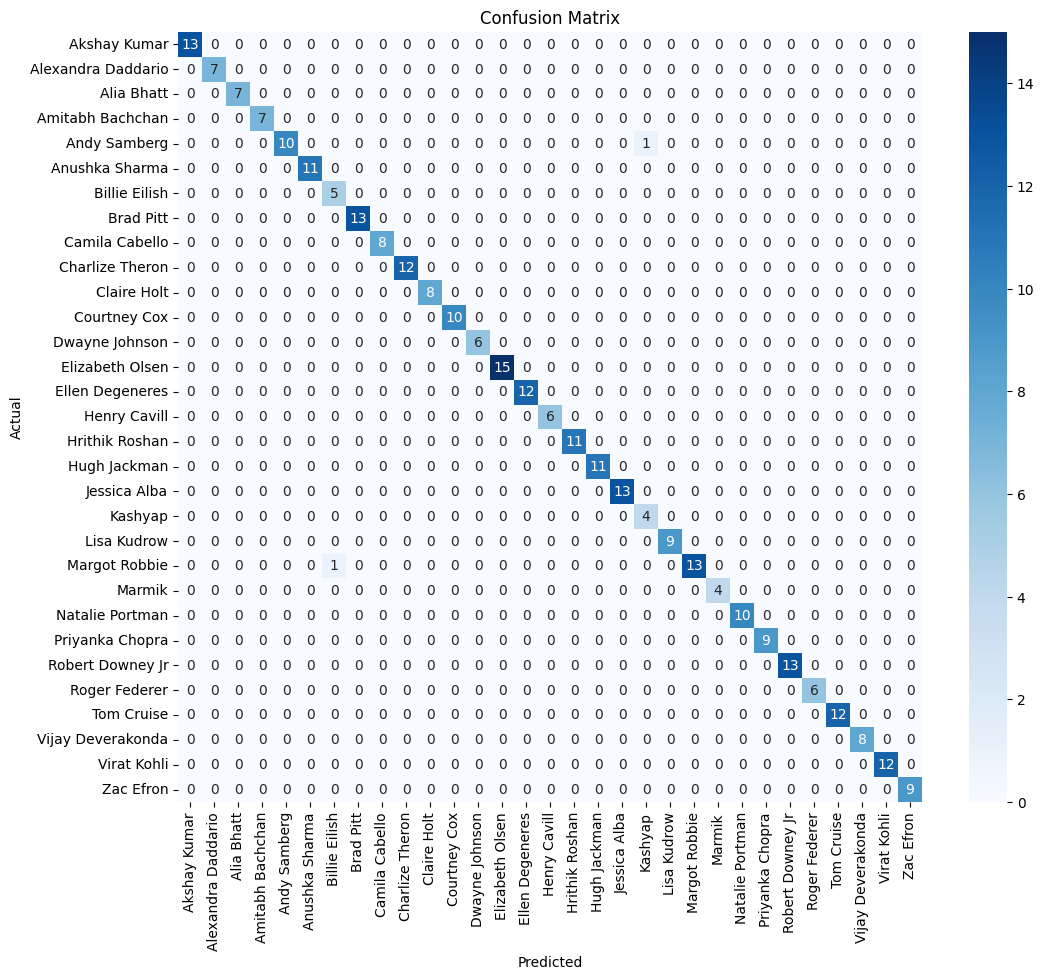

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


acc = accuracy_score(y_true_labels, y_pred_labels)
print(f"✅ Accuracy on test set: {acc:.2f}")

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=le.classes_, yticklabels=le.classes_,
            annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


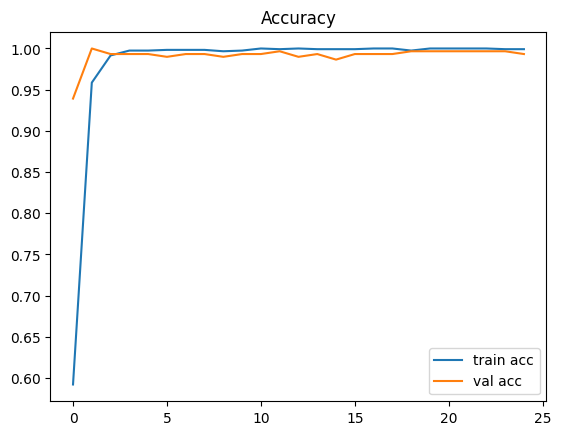

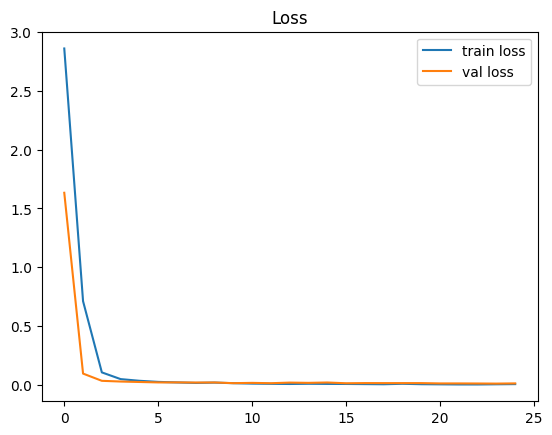

In [22]:

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


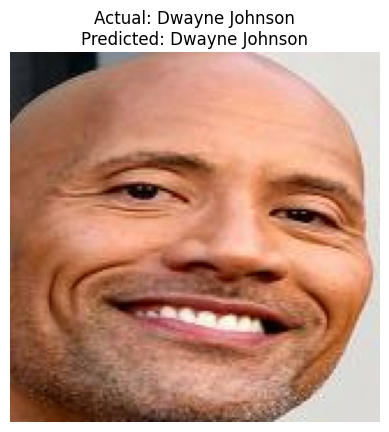

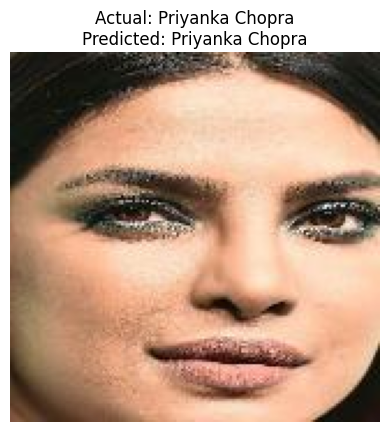

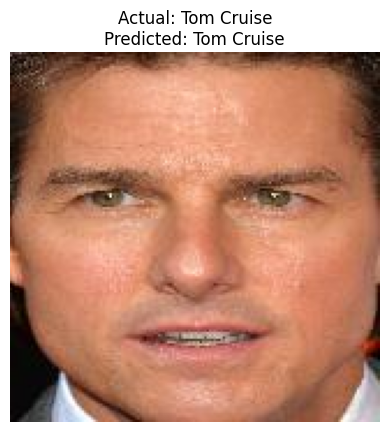

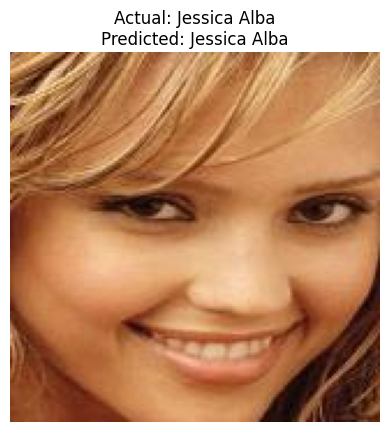

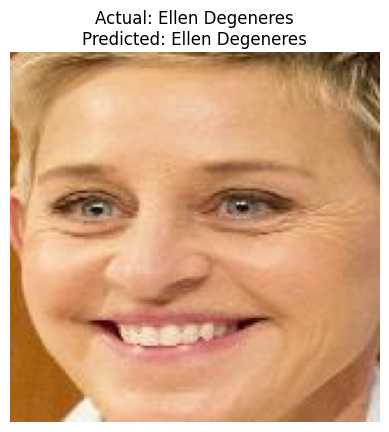

In [23]:
import matplotlib.pyplot as plt


y_pred = model.predict(np.array(X_test))
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

y_pred_names = le.inverse_transform(y_pred_labels)
y_true_names = le.inverse_transform(y_true_labels)


for i in range(5):
    img = cv2.imread(path_test[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {y_true_names[i]}\nPredicted: {y_pred_names[i]}")
    plt.show()
